In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


### --- Import des différentes librairies ---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import plotly.express as px

### --- Import de la base de données ---

In [4]:
df = pd.read_csv("Speed_Dating_Data.csv", encoding='cp1252')
with pd.option_context("display.max_columns", None):
    display(df.head())


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

Suppression des vagues de participants 6 à 9 car elle comporte une autre notation, ce qui biaisera notre analyse de données

In [5]:
mask = df['wave'].between(6,9)
df=df[~mask]

Suppression des colonnes comportant une certaine densité de valeurs manquantes et celles inutiles pour notre EDA

In [6]:
pourcentage_manquantes = (df.isnull().sum() / len(df)) * 100
print(pourcentage_manquantes)

## Utilisation de la méthode pour détecter les valeurs manquantes pour ensuite obtenir le pourcentage
## de valeurs manquantes au sein de chaque colonne de notre dataframe.



iid          0.000000
id           0.014671
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     70.422535
sinc5_3     70.422535
intel5_3    70.422535
fun5_3      70.422535
amb5_3      70.422535
Length: 195, dtype: float64


In [7]:
drop_columns = list(pourcentage_manquantes[pourcentage_manquantes >60].index) + ['id',
                                                                                 'idg',
                                                                                 'condtn',
                                                                                 'position',
                                                                                 'positin1',
                                                                                 'pid',
                                                                                 'undergra',
                                                                                'mn_sat',
                                                                                'tuition',
                                                                                 'from',
                                                                                 'zipcode',
                                                                                 'income',
                                                                                "attr2_1",
                                                                                "sinc2_1",
                                                                                "intel2_1",
                                                                                "fun2_1",
                                                                                "amb2_1",
                                                                                "shar2_1",
                                                                                "attr2_2",
                                                                                "sinc2_2",
                                                                                "intel2_2",
                                                                                "fun2_2",
                                                                                "amb2_2",
                                                                                "shar2_2",
                                                                                "attr4_1",
                                                                                "sinc4_1",
                                                                                "intel4_1",
                                                                                "fun4_1",
                                                                                "amb4_1",
                                                                                "shar4_1",
                                                                                "attr4_2",
                                                                                "sinc4_2",
                                                                                "intel4_2",
                                                                                "fun4_2",
                                                                                "amb4_2",
                                                                                "shar4_2",
                                                                                "attr5_1",
                                                                                "sinc5_1",
                                                                                "intel5_1",
                                                                                "fun5_1",
                                                                                "amb5_1",
                                                                                "attr5_2",
                                                                                "sinc5_2",
                                                                                "intel5_2",
                                                                                "fun5_2",
                                                                                "amb5_2",
                                                                                "tvsports",
                                                                                "dining",	
                                                                                "museums",	
                                                                                "art",	
                                                                                "hiking",	
                                                                                "gaming",	
                                                                                "clubbing",	
                                                                                "reading",
                                                                                "tv",	
                                                                                "theater",	
                                                                                "movies",	
                                                                                "concerts",	
                                                                                "music",	
                                                                                "shopping",	
                                                                                "yoga"]
drop_columns

['expnum',
 'attr1_s',
 'sinc1_s',
 'intel1_s',
 'fun1_s',
 'amb1_s',
 'shar1_s',
 'attr3_s',
 'sinc3_s',
 'intel3_s',
 'fun3_s',
 'amb3_s',
 'attr7_2',
 'sinc7_2',
 'intel7_2',
 'fun7_2',
 'amb7_2',
 'shar7_2',
 'numdat_3',
 'num_in_3',
 'attr7_3',
 'sinc7_3',
 'intel7_3',
 'fun7_3',
 'amb7_3',
 'shar7_3',
 'attr4_3',
 'sinc4_3',
 'intel4_3',
 'fun4_3',
 'amb4_3',
 'shar4_3',
 'attr2_3',
 'sinc2_3',
 'intel2_3',
 'fun2_3',
 'amb2_3',
 'shar2_3',
 'attr5_3',
 'sinc5_3',
 'intel5_3',
 'fun5_3',
 'amb5_3',
 'id',
 'idg',
 'condtn',
 'position',
 'positin1',
 'pid',
 'undergra',
 'mn_sat',
 'tuition',
 'from',
 'zipcode',
 'income',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr2_2',
 'sinc2_2',
 'intel2_2',
 'fun2_2',
 'amb2_2',
 'shar2_2',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr4_2',
 'sinc4_2',
 'intel4_2',
 'fun4_2',
 'amb4_2',
 'shar4_2',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1',
 'attr5_2',
 'sinc5

In [8]:
df_clean = df.drop(columns=drop_columns)
print("\nForme du DataFrame avant suppression :", df.shape)
print("Forme du DataFrame après suppression :", df_clean.shape)


Forme du DataFrame avant suppression : (6816, 195)
Forme du DataFrame après suppression : (6816, 91)


In [9]:
df_clean.rename(columns={"iid":"unique_ID",
                         "age_o":"age_partenaire",
                         "race_o":"origine_partenaire",
                         "dec_o":"decision_partenaire",
                         "field_cd":"domaine_etudes",
                         "imprace":"importance_meme_origine",
                         "imprelig":"importance_meme_religion",
                         "satis_2":"satisfaction_apres_T1",
                         "pf_o_att":"pref_partenaire_att",
                         "career_c":"domaine_carriere",
                         "exphappy":"heureux_avant",
                         "attr1_1":"seduisant_1T",
                         "sinc1_1":"sincerite_1T",
                         "intel1_1":"intelligent_1T",
                         "fun1_1":"amusant_1T",
                         "amb1_1":"ambitieux_1T",
                         "shar1_1":"interetscommuns_1T",
                         "attr3_1":"seduisant_luimeme_1T",
                         "sinc3_1":"sincerite_luimeme_1T",
                         "intel3_1":"intelligent_luimeme_1T",
                         "fun3_1":"amusant_luimeme_1T",
                         "amb3_1":"ambitieux_luimeme_1T",
                         "dec": "decision_uniqueID",
                         "attr": "note_seduisant_uniqueID",
                         "sinc": "note_sincerite_uniqueID",
                         "intel": "note_intelligent_uniqueID",
                         "fun": "note_amusant_uniqueID",
                         "amb": "note_ambitieux_uniqueID",
                         "shar": "note_interetscommuns_uniqueID",
                         "like": "like_uniqueID",
                         "prob": "probabilite_oui_partenaire_for_uniqueID",
                         "met": "rencontre_avant",
                         "match_es":"matchs_estimated",
                         "attr1_2":"seduisant_2T",
                         "sinc1_2":"sincerite_2T",
                         "intel1_2":"intelligent_2T",
                         "fun1_2":"amusant_2T",
                         "amb1_2":"ambitieux_2T",
                         "shar1_2":"interetscommuns_2T",
                         "attr3_2":"seduisant_luimeme_2T",
                         "sinc3_2":"sincerite_luimeme_2T",
                         "intel3_2":"intelligent_luimeme_2T",
                         "fun3_2":"amusant_luimeme_2T",
                         "amb3_2":"ambitieux_luimeme_2T",
                         "you_call":"appel_luimeme",
                         "them_cal":"appel_par_partenaires",
                         "date_3":"date_avec_matchs_3T",
                         "attr1_3":"seduisant_3T",
                         "sinc1_3":"sincerite_3T",
                         "intel1_3":"intelligent_3T",
                         "fun1_3":"amusant_3T",
                         "amb1_3":"ambitieux_3T",
                         "shar1_3":"interetscommuns_3T",
                         "attr3_3":"seduisant_luimeme_3T",
                         "sinc3_3":"sincerite_luimeme_3T",
                         "intel3_3":"intelligent_luimeme_3T",
                         "fun3_3":"amusant_luimeme_3T",
                         "amb3_3":"ambitieux_luimeme_3T",
                         "gender":"genre",
                         "order":"ordre",
                         "race": "origine",
                         "goal":"objectif",
                         "go_out": "sortie",
                         "from":"origine_domicile",
                         "wave": "vague",
                         "round":"nb_personnes_rencontrees",
                         "numdat_2": "nombre_dates_satis",
                         "length" : "longueur_date_satis",
                         "attr_o" : "seduisant_selon_partenaire",
                         "sinc_o": "sincerite_selon_partenaire",
                         "intel_o":"intelligent_selon_partenaire",
                         "fun_o": "amusant_selon_partenaire", 
                         "amb_o": "ambitieux_selon_partenaire"
                },inplace=True)



# --- Légende ---

## 1T : le soir du speed-dating
1T: ce que recherche l'UniqueID le soir du speed-dating

luimeme_1T : qu'est ce que l'UniqueID pense de lui même le soir du speed-dating

note_..._UniqueID : qu'est ce que l'UniqueID pense de son partenaire

## 2T : le lendemain du speed-dating
2T : ce que recherche l'UniqueID le lendemain du speed-dating

luimeme_2T : qu'est ce que l'UniqueID pense de lui même le lendemain du speed-dating

## 3T : 3 à 4 semaines après le speed-dating
3T : ce que recherche l'UniqueID 3 à 4 semaines après le speed-dating

luimeme_3T : qu'est ce que l'UniqueID pense de lui même 3 à 4 semaines après le speed-dating


In [10]:
with pd.option_context("display.max_columns", None):
    display(df_clean.head())

,unique_ID,genre,vague,nb_personnes_rencontrees,ordre,partner,match,int_corr,samerace,age_partenaire,origine_partenaire,pref_partenaire_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,decision_partenaire,seduisant_selon_partenaire,sincerite_selon_partenaire,intelligent_selon_partenaire,amusant_selon_partenaire,ambitieux_selon_partenaire,shar_o,like_o,prob_o,met_o,age,field,domaine_etudes,origine,importance_meme_origine,importance_meme_religion,objectif,date,sortie,career,domaine_carriere,sports,exercise,heureux_avant,seduisant_1T,sincerite_1T,intelligent_1T,amusant_1T,ambitieux_1T,interetscommuns_1T,seduisant_luimeme_1T,sincerite_luimeme_1T,amusant_luimeme_1T,intelligent_luimeme_1T,ambitieux_luimeme_1T,decision_uniqueID,note_seduisant_uniqueID,note_sincerite_uniqueID,note_intelligent_uniqueID,note_amusant_uniqueID,note_ambitieux_uniqueID,note_interetscommuns_uniqueID,like_uniqueID,probabilite_oui_partenaire_for_uniqueID,rencontre_avant,matchs_estimated,satisfaction_apres_T1,longueur_date_satis,nombre_dates_satis,seduisant_2T,sincerite_2T,intelligent_2T,amusant_2T,ambitieux_2T,interetscommuns_2T,seduisant_luimeme_2T,sincerite_luimeme_2T,intelligent_luimeme_2T,amusant_luimeme_2T,ambitieux_luimeme_2T,appel_luimeme,appel_par_partenaires,date_avec_matchs_3T,seduisant_3T,sincerite_3T,intelligent_3T,amusant_3T,ambitieux_3T,interetscommuns_3T,seduisant_luimeme_3T,sincerite_luimeme_3T,intelligent_luimeme_3T,amusant_luimeme_3T,ambitieux_luimeme_3T
0,1,0,1,10,4,1,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,2.0,7.0,1.0,lawyer,NaN,9.0,8.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
1,1,0,1,10,3,2,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,2.0,7.0,1.0,lawyer,NaN,9.0,8.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
2,1,0,1,10,10,3,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,4.0,2.0,4.0,2.0,7.0,1.0,lawyer,NaN,9.0,8.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
3,1,0,1,10,5,4,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,2.0,7.0,1.0,lawyer,NaN,9.0,8.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0
4,1,0,1,10,7,5,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,2.0,7.0,1.0,lawyer,NaN,9.0,8.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0,1.0,1.0,0.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,7.0,7.0,7.0,7.0


### --- Fonction catégorie d'âge ---
Mise en place d'une catégorisation selon l'âge (2 catégories créées)

In [11]:
def age_categorie(age):
    if  age <= 26:
        return 'Etudiants_Jeunes_actifs'
    else :
        return 'Adultes_etablis'
    
df_clean['categorie_age'] = df_clean['age'].apply(age_categorie)

Mise en place d'une nouvelle colonne représentation la variable string de l'origine, le genre, les domaines d'études et professionnels ainsi que les objectifs du participant.

In [12]:
race_labels = {
    1:'noir/Afro-Américain',
    2:'Européen/Caucasien-Américain',
    3:'Latino/Hispano-Américain',
    4:'Asiatique/Insulaire du Pacifique/Asiatique-Américain',
    5:'Americain',
    6:'Autre'
}

gender_labels = {
    0: 'femme',
    1 : 'homme'
}

goal_labels = {
    1: 'soirée amusante/plaisante',
    2: 'Rencontrer de nouvelles personnes',
    3: 'Obtenir un rendez-vous',
    4: 'Relation sérieuse',
    5: "Pour pouvoir dire je l'ai fait",
    6: 'Autre'
}

study_field_labels = {
    1: 'Droit',
    2: 'Mathématiques',
    3: 'Sciences Sociales, Psychologie',
    4: 'Sciences Médicales, Produits Pharmaceutiques et Bio Tech',
    5: 'Ingénierie',
    6: 'Anglais / Écriture / Journalisme',
    7: 'Histoire / Religion / Philosophie',
    8: 'Affaires / Économie / Finance',
    9: 'Éducation, Milieu universitaire',
    10: 'Sciences Bio / Chimie / Physique',
    11: 'Travail Social',
    12: 'Autre',
    13: 'Science Politique / Affaires Internationales',
    14: 'Cinéma',
    15: 'Beaux-Arts / Administration des Arts',
    16: 'Autre',
    17: 'Autre',
    18: 'Autre'
}

career_field_labels = {
    1: 'Avocat',
    2: 'Universitaire/Recherche',
    3: 'Psychologue',
    4: 'Docteur/Médecine',
    5: 'Ingénieur',
    6: 'Arts Créatifs/Divertissement',
    7: 'Banque/Consulting/Finance/Marketing/Affaires/PDG',
    8: 'Autre',
    9: 'Affaires Internationales/Humanitaires',
    10: 'Indécis',
    11: 'Travail Social',
    12: 'Autre',
    13: 'Politique',
    14: 'Autre',
    15: 'Autre',
    16: 'Autre',
    17: 'Autre'
    }

numb_dates_rating_labels = {
    1:'Pas assez de dates',
    2:'Trop de dates',
    3:'Nombre adéquat'
}

date_matches_labels = {
    1:'oui',
    2:'non'
}

decision_labels = {
    1:'oui',
    0:'non'
}

date_go_out_labels = {
    1: 'fréquemment : 1 à plusieurs fois par semaine',
    2: 'fréquemment : 1 à plusieurs fois par semaine',
    3: 'fréquemment : 1 à plusieurs fois par semaine',
    4: 'fréquence moyenne : 1 à 2 fois par mois',
    5: 'fréquence moyenne : 1 à 2 fois par mois',
    6: 'rarement : quelques fois par an voire jamais',
    7: 'rarement : quelques fois par an voire jamais'
}

length_labels = {
    1 : 'Trop court',
    2 : 'Trop long',
    3 : 'durée adéquate'
}
## La catégorisation 'Autre' est mise en place pour regrouper les derniers domaines à faible valeur pour une 
## meilleure visualisation.


Remplacement des valeurs par des termes plus parlants pour notre EDA. 

In [13]:
df_clean['origine'] = df_clean['origine'].map(race_labels)
df_clean['genre'] = df_clean['genre'].map(gender_labels)
df_clean['objectif'] = df_clean['objectif'].map(goal_labels)
df_clean['domaine_etudes'] = df_clean['domaine_etudes'].map(study_field_labels)
df_clean['domaine_carriere'] = df_clean['domaine_carriere'].map(career_field_labels)
df_clean['nombre_dates_satis'] = df_clean['nombre_dates_satis'].map(numb_dates_rating_labels)
df_clean['date_avec_matchs_3T'] = df_clean['date_avec_matchs_3T'].map(date_matches_labels)
df_clean['decision_uniqueID_label'] = df_clean['decision_uniqueID'].map(decision_labels)
df_clean['rencontre_avant'] = df_clean['rencontre_avant'].map(date_matches_labels)
df_clean['date_frequence'] = df_clean['date'].map(date_go_out_labels)
df_clean['sortie_frequence'] = df_clean['sortie'].map(date_go_out_labels)
df_clean['longueur_date_satis'] = df_clean['longueur_date_satis'].map(length_labels)

________________________________________________________________________________________________________

# Présentation de notre panel de participants (Unique ID)

Avant d'entrer dans notre analyse concernant les soirées speed-dating, présentons notre panel de participants.

### --- Mise en place d'un dataframe avec des ID unique ---

In [14]:
df_unique = df_clean.drop_duplicates('unique_ID')

In [15]:
age_counts = df_unique['age'].value_counts()
age_counts

age
27.0    54
25.0    46
23.0    45
24.0    45
26.0    44
22.0    37
29.0    34
28.0    32
30.0    31
21.0    21
32.0    11
33.0    11
34.0    10
20.0     5
31.0     4
35.0     3
36.0     3
19.0     2
39.0     1
18.0     1
38.0     1
55.0     1
Name: count, dtype: int64

In [16]:
origine_counts = df_unique['origine'].value_counts()
origine_counts

origine
Européen/Caucasien-Américain                            245
Asiatique/Insulaire du Pacifique/Asiatique-Américain    112
Latino/Hispano-Américain                                 36
Autre                                                    32
noir/Afro-Américain                                      19
Name: count, dtype: int64

In [17]:
genre_counts = df_unique['genre'].value_counts()
genre_counts

genre
homme    226
femme    223
Name: count, dtype: int64

In [18]:
df_unique['domaine_etudes'].isnull().sum()

np.int64(6)

In [19]:
domaine_etudes_counts = df_unique['domaine_etudes'].value_counts()
domaine_etudes_counts

domaine_etudes
Affaires / Économie / Finance                               96
Ingénierie                                                  52
Droit                                                       45
Sciences Sociales, Psychologie                              42
Sciences Bio / Chimie / Physique                            40
Éducation, Milieu universitaire                             39
Travail Social                                              29
Science Politique / Affaires Internationales                28
Anglais / Écriture / Journalisme                            19
Beaux-Arts / Administration des Arts                        11
Histoire / Religion / Philosophie                           11
Mathématiques                                                9
Autre                                                        8
Sciences Médicales, Produits Pharmaceutiques et Bio Tech     7
Cinéma                                                       7
Name: count, dtype: int64

In [20]:
domaine_carriere_counts = df_unique['domaine_carriere'].value_counts()
domaine_carriere_counts

domaine_carriere
Universitaire/Recherche                             116
Banque/Consulting/Finance/Marketing/Affaires/PDG    106
Avocat                                               44
Arts Créatifs/Divertissement                         41
Affaires Internationales/Humanitaires                26
Indécis                                              23
Docteur/Médecine                                     22
Psychologue                                          16
Ingénieur                                            14
Travail Social                                       14
Autre                                                11
Politique                                             5
Name: count, dtype: int64

In [21]:
mediane = df_clean['age'].median()


### --- Visualisation socio-démographique de notre panel ---

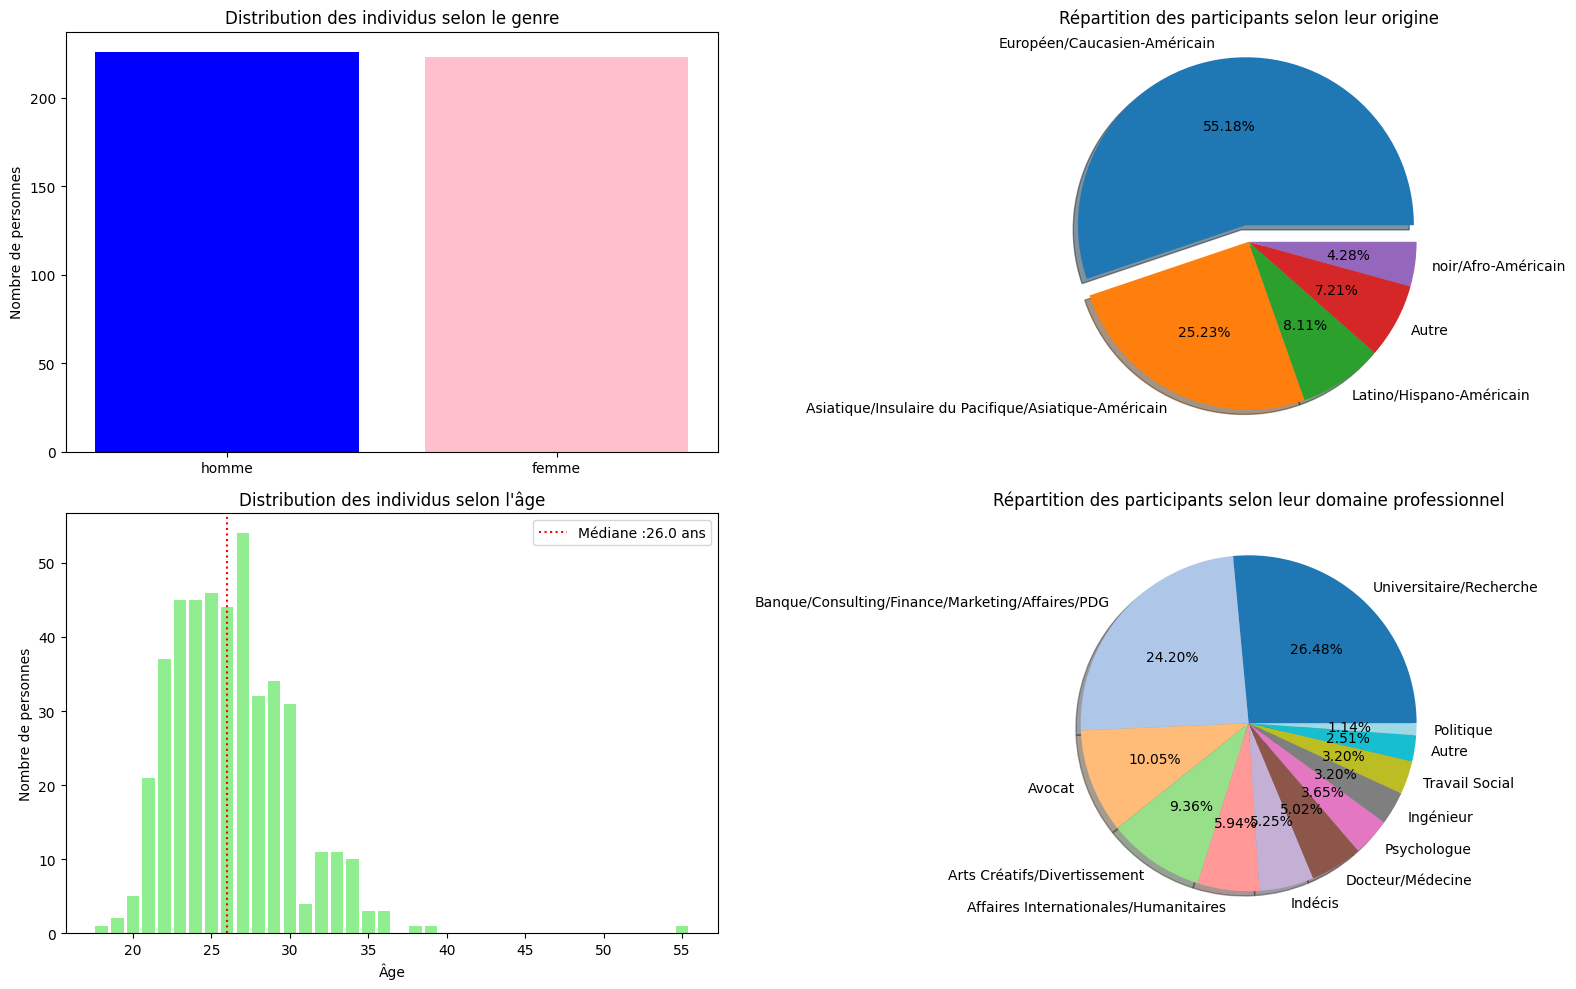

In [22]:
# Création de la figure et de la grille
fig = plt.figure(figsize=(16,10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])  # 2lignes, 2 colonnes

# --- Premier graphique : genre_counts ---
ax1 = fig.add_subplot(gs[0, 0])
couleurs = ['blue', 'pink']
ax1.bar(genre_counts.index, genre_counts.values, color =couleurs)
ax1.set_title("Distribution des individus selon le genre")
ax1.set_ylabel("Nombre de personnes")

# --- Deuxième graphique : race_counts (pie) ---
ax2 = fig.add_subplot(gs[0, 1])
ax2.pie(origine_counts.values, labels=origine_counts.index, explode= (0.1,0,0,0,0), autopct="%1.2f%%", shadow=True)
ax2.set_title("Répartition des participants selon leur origine")

# --- Troisième graphique : age_counts ---
ax3 = fig.add_subplot(gs[1, 0])  # prend toute la ligne du bas
ax3.bar(age_counts.index, age_counts.values, color='lightgreen')
ax3.axvline(mediane, color='red', linestyle=':', label=f'Médiane :{mediane:.1f} ans')
ax3.set_title("Distribution des individus selon l'âge")
ax3.set_xlabel("Âge")
ax3.set_ylabel("Nombre de personnes")
ax3.legend()
"""
# --- Quatrième graphique : field_counts (pie) ---
ax2 = fig.add_subplot(gs[1, 1])
ax2.pie(study_field_counts.values, labels=study_field_counts.index, explode= (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0), autopct="%1.2f%%", shadow=True)
ax2.set_title("Répartition des participants selon leur domaine d'études")
"""
# --- Quatrième graphique : career_counts ---
ax2 = fig.add_subplot(gs[1, 1])
cmap = plt.cm.tab20 # Ou plt.cm.Set3
colors = [cmap(i) for i in np.linspace(0, 1, len(domaine_carriere_counts))]  # prend toute la ligne du bas
ax2.pie(domaine_carriere_counts.values, labels=domaine_carriere_counts.index, autopct="%1.2f%%", shadow=True, colors=colors)
ax2.set_title("Répartition des participants selon leur domaine professionnel")
## Mise en place d'une palette de couleurs plus importante pour le graphique du domaine professionnel

# Ajuster les espacements
plt.tight_layout()
plt.show()


### --- Synthèse socio-démographique ---

Il y a une proportion quasi égale d'hommes et de femmes qui ont participé aux soirées de speed-dating. 

Concernant l'origine des participants, ils sont majoritairement de type Caucasien-Américain, avec un âge médian de 26 ans. 

Pour ce qui est du domaine professionnel, on observe une proportion majoritaire venant des métiers de l'éducation et de la recherche, devançant les métiers du business, de la banque et de l'entreprenariat. 

A noter que notre database a été catégorisée concernant l'âge des participants en 2 catégories (26 ans et moins : les étudiants et jeunes actifs et les 27 ans et plus : les adultes établis)

--------------------------------------------------------------------------------------------------

# Les objectifs des participants du speed-dating

Les participants du speed-dating sont venus sur plusieurs soirées organisées. Cependant, les objectifs de ces participants ne sont pas les mêmes. 

Déterminons quels sont les objectifs prédominants et analysons s'ils diffèrent selon l'âge.

In [23]:
goal_counts = df_unique['objectif'].value_counts()
goal_counts

objectif
soirée amusante/plaisante            180
Rencontrer de nouvelles personnes    157
Obtenir un rendez-vous                34
Pour pouvoir dire je l'ai fait        30
Autre                                 26
Relation sérieuse                     16
Name: count, dtype: int64

In [24]:
age_group_counts = df_unique['categorie_age'].value_counts()
age_group_counts

categorie_age
Etudiants_Jeunes_actifs    246
Adultes_etablis            203
Name: count, dtype: int64

In [25]:
df_unique[df_unique['categorie_age'] == 'Etudiants_Jeunes_actifs']


,unique_ID,genre,vague,nb_personnes_rencontrees,ordre,partner,match,int_corr,samerace,age_partenaire,...,interetscommuns_3T,seduisant_luimeme_3T,sincerite_luimeme_3T,intelligent_luimeme_3T,amusant_luimeme_3T,ambitieux_luimeme_3T,categorie_age,decision_uniqueID_label,date_frequence,sortie_frequence
0,1,femme,1,10,4,1,0,0.14,0,27.0,...,15.0,5.0,7.0,7.0,7.0,7.0,Etudiants_Jeunes_actifs,oui,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine
10,2,femme,1,10,10,1,0,0.29,1,27.0,...,10.0,7.0,6.0,9.0,9.0,4.0,Etudiants_Jeunes_actifs,non,fréquence moyenne : 1 à 2 fois par mois,fréquemment : 1 à plusieurs fois par semaine
20,3,femme,1,10,6,1,0,-0.24,1,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Etudiants_Jeunes_actifs,non,fréquemment : 1 à plusieurs fois par semaine,fréquemment : 1 à plusieurs fois par semaine
30,4,femme,1,10,3,1,0,-0.18,1,27.0,...,20.0,6.0,5.0,6.0,8.0,5.0,Etudiants_Jeunes_actifs,non,fréquence moyenne : 1 à 2 fois par mois,fréquemment : 1 à plusieurs fois par semaine
40,5,femme,1,10,1,1,0,-0.43,1,27.0,...,10.0,4.0,5.0,10.0,6.0,10.0,Etudiants_Jeunes_actifs,non,fréquence moyenne : 1 à 2 fois par mois,fréquemment : 1 à plusieurs fois par semaine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8136,542,homme,21,22,16,1,0,0.43,1,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Etudiants_Jeunes_actifs,non,fréquence moyenne : 1 à 2 fois par mois,fréquemment : 1 à plusieurs fois par semaine
8158,543,homme,21,22,10,1,0,0.04,1,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Etudiants_Jeunes_actifs,non,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine
8180,544,homme,21,22,17,1,0,-0.04,1,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Etudiants_Jeunes_actifs,non,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine
8202,545,homme,21,22,3,1,0,0.03,0,28.0,...,10.0,9.0,9.0,9.0,9.0,9.0,Etudiants_Jeunes_actifs,non,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine


In [26]:
objectifs_age_jeunes = df_unique[df_unique['categorie_age'] == 'Etudiants_Jeunes_actifs']['objectif'].value_counts()
objectifs_age_jeunes

objectif
soirée amusante/plaisante            112
Rencontrer de nouvelles personnes     80
Pour pouvoir dire je l'ai fait        22
Autre                                 14
Obtenir un rendez-vous                13
Relation sérieuse                      4
Name: count, dtype: int64

In [27]:
df_unique[df_unique['categorie_age'] == 'Adultes_etablis']


,unique_ID,genre,vague,nb_personnes_rencontrees,ordre,partner,match,int_corr,samerace,age_partenaire,...,interetscommuns_3T,seduisant_luimeme_3T,sincerite_luimeme_3T,intelligent_luimeme_3T,amusant_luimeme_3T,ambitieux_luimeme_3T,categorie_age,decision_uniqueID_label,date_frequence,sortie_frequence
100,11,homme,1,10,4,1,0,0.14,0,21.0,...,10.0,7.0,8.0,7.0,7.0,5.0,Adultes_etablis,non,fréquence moyenne : 1 à 2 fois par mois,fréquence moyenne : 1 à 2 fois par mois
160,17,homme,1,10,1,1,0,0.34,0,21.0,...,5.0,7.0,8.0,8.0,6.0,6.0,Adultes_etablis,non,fréquemment : 1 à plusieurs fois par semaine,fréquemment : 1 à plusieurs fois par semaine
170,18,homme,1,10,2,1,0,0.50,0,21.0,...,10.0,6.0,7.0,8.0,6.0,9.0,Adultes_etablis,non,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine
180,19,homme,1,10,8,1,1,0.28,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Adultes_etablis,oui,fréquemment : 1 à plusieurs fois par semaine,fréquemment : 1 à plusieurs fois par semaine
216,22,femme,2,16,8,1,0,0.29,0,25.0,...,20.0,7.0,8.0,8.0,7.0,6.0,Adultes_etablis,non,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,547,homme,21,22,6,1,0,0.58,0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Adultes_etablis,non,fréquemment : 1 à plusieurs fois par semaine,fréquemment : 1 à plusieurs fois par semaine
8268,548,homme,21,22,13,1,1,0.23,0,28.0,...,20.0,8.0,9.0,9.0,9.0,9.0,Adultes_etablis,oui,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine
8290,549,homme,21,22,15,1,0,0.43,0,28.0,...,5.0,7.0,9.0,8.0,7.0,8.0,Adultes_etablis,non,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine
8312,550,homme,21,22,2,1,0,0.65,0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Adultes_etablis,non,fréquence moyenne : 1 à 2 fois par mois,fréquemment : 1 à plusieurs fois par semaine


In [28]:
objectifs_age_adult = df_unique[df_unique['categorie_age'] == 'Adultes_etablis']['objectif'].value_counts()
objectifs_age_adult

objectif
Rencontrer de nouvelles personnes    77
soirée amusante/plaisante            68
Obtenir un rendez-vous               21
Relation sérieuse                    12
Autre                                12
Pour pouvoir dire je l'ai fait        8
Name: count, dtype: int64

In [29]:
index_maitre = goal_counts.index

## Mise en place d'un même index pour pouvoir harmoniser le graphique.

In [30]:
objectif_jeunes_aligned = objectifs_age_jeunes.reindex(index_maitre, fill_value=0)
objectif_adult_aligned = objectifs_age_adult.reindex(index_maitre, fill_value=0)



### --- Visualisation / Objectif des participants ---

Text(0.5, 1.0, "Répartition des objectifs du speedating selon l'ensemble des participants")

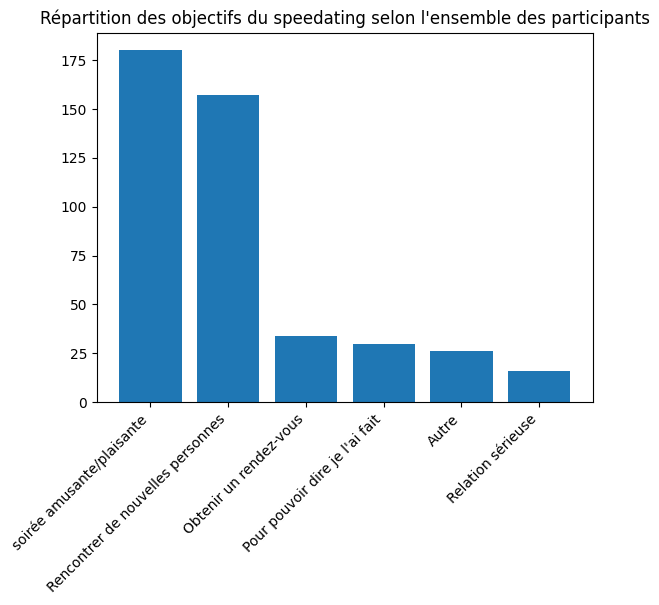

In [31]:
plt.bar(
    x=goal_counts.index,
    height=goal_counts.values,   
)
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des objectifs du speedating selon l'ensemble des participants")

Text(0.5, 1.0, "Répartition des objectifs du speedating selon la catégorie d'âge")

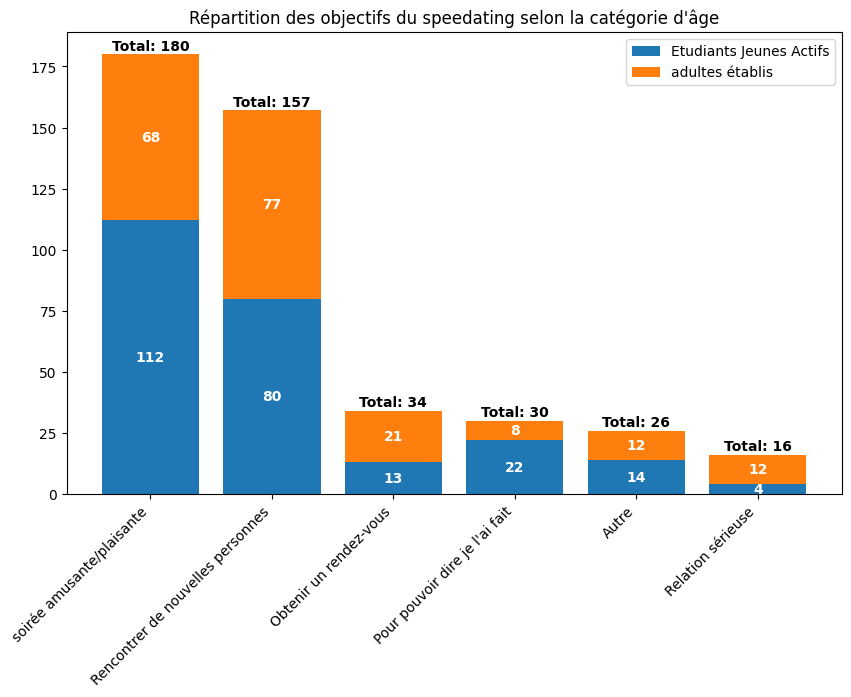

In [32]:
bottom_1 = objectif_jeunes_aligned.values 

plt.figure(figsize=(10,6))
plt.bar(
    x=objectif_jeunes_aligned.index,
    height=objectif_jeunes_aligned.values,
    label='Etudiants Jeunes Actifs'    
)
plt.bar(
    x=objectif_adult_aligned.index,
    height=objectif_adult_aligned.values,
    bottom=bottom_1,
    label='adultes établis'
)

for i, val in enumerate(objectif_jeunes_aligned.values):
    plt.text(
        i, 
        val / 2,
        f'{val}',
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

for i, val in enumerate(objectif_adult_aligned.values):
    
    y_position = bottom_1[i] + val / 2
    plt.text(
        i,                      
        y_position,             
        f'{val}',               
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )
    
total_values = objectif_jeunes_aligned.values + objectif_adult_aligned.values
for i, total in enumerate(total_values):
    
    plt.text(
        i,                      
        total + 0.5,            
        f'Total: {total}',      
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.title("Répartition des objectifs du speedating selon la catégorie d'âge")

### --- Conclusion / Objectifs des participants ---

Les participants du speed-dating souhaitent avant tout passer une bonne soirée et rencontrer de nouvelles personnes, quelque soit la catégorie d'âge. 

Néanmoins, on observe une volonté accrue pour les personnes de 27 ans et plus d'avoir une relation sérieuse à la suite de ce speed-dating. 

_____________________________________________________

# Corrélation entre les critères de séduction et la décision finale du participant

Ensuite, on souhaite faire une première analyse sur le match en tant que tel. 

Cette première analyse portera sur les critères de séduction et leur impact sur la décision finale du participant de vouloir revoir ou non le partenaire du soir. 

On va effectuer des analyses à une temporalité différente (avant la soirée, juste après la rencontre, le lendemain ou encore un mois après la soirée analysée).

In [33]:
criteres = ["seduisant_1T", "sincerite_1T", "intelligent_1T", "amusant_1T", "ambitieux_1T", "interetscommuns_1T"]

### --- Visualisation / Importance des critères de séduction avant la soirée ---

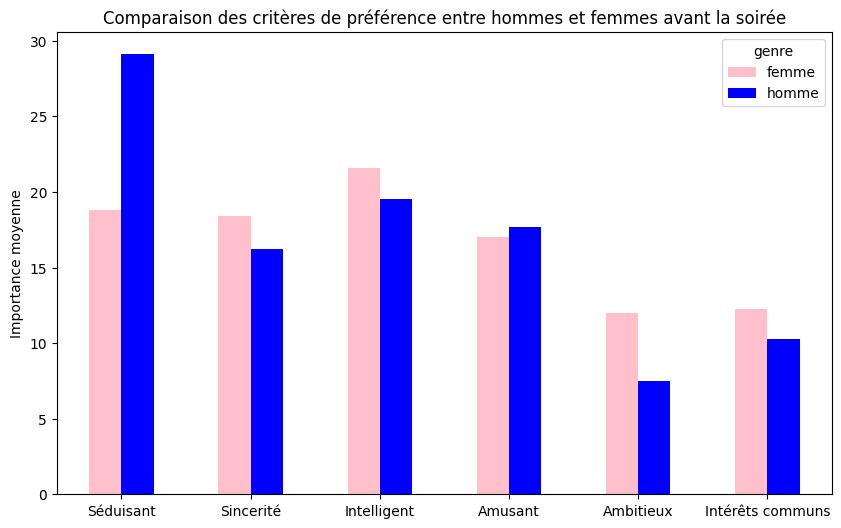

In [34]:
labels = ["Séduisant", "Sincerité", "Intelligent", "Amusant", "Ambitieux", "Intérêts communs"]
couleurs = ['pink', 'blue']
df_clean.groupby('genre')[criteres].mean().T.plot(kind='bar', figsize=(10,6), color=couleurs)
plt.title("Comparaison des critères de préférence entre hommes et femmes avant la soirée")
plt.ylabel("Importance moyenne")
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
plt.show()

On remarque ici que l'attirance et le côté physique est le critère le plus important pour la gente masculine.

Pour la gente féminine, celles-ci interrogées avant le speed-dating priorisent l'intelligence comme critère de personnalité pour leur partenaire. 

 

==============

Une nouvelle analyse porte désormais sur le questionnaire posé aux participants suite au speed-dating et sur leur volonté de revoir leur partenaire.

On va demander aux participants de noter leurs différents partenaires de la soirée selon les différents critères et demander en fin de questionnaire s'il souhaite le revoir. 

In [35]:
columns_correlation = ["decision_uniqueID", "note_seduisant_uniqueID", "note_sincerite_uniqueID", "note_intelligent_uniqueID", "note_amusant_uniqueID", "note_ambitieux_uniqueID","note_interetscommuns_uniqueID"]



In [36]:
nouveaux_noms = {
    'decision_uniqueID': 'Décision de Match (1/0)',
    'note_seduisant_uniqueID': 'Note: Seduisant',
    'note_sincerite_uniqueID': 'Note: Sincérité',
    'note_intelligent_uniqueID': 'Note: Intelligent',
    'note_amusant_uniqueID': 'Note: Amusant',
    'note_ambitieux_uniqueID': 'Note: Ambitieux',
    'note_interetscommuns_uniqueID': 'Note: Intérêts Communs'
}

### Nouveaux noms précisés pour une meilleure visualisation.

In [37]:
matrice_correlation =df_clean[columns_correlation].corr()


In [38]:
matrice_correlation_renommee = matrice_correlation.rename(
    columns=nouveaux_noms,
    index=nouveaux_noms
)

### --- Visualisation / Corrélation entre critères de séduction et décision finale ---

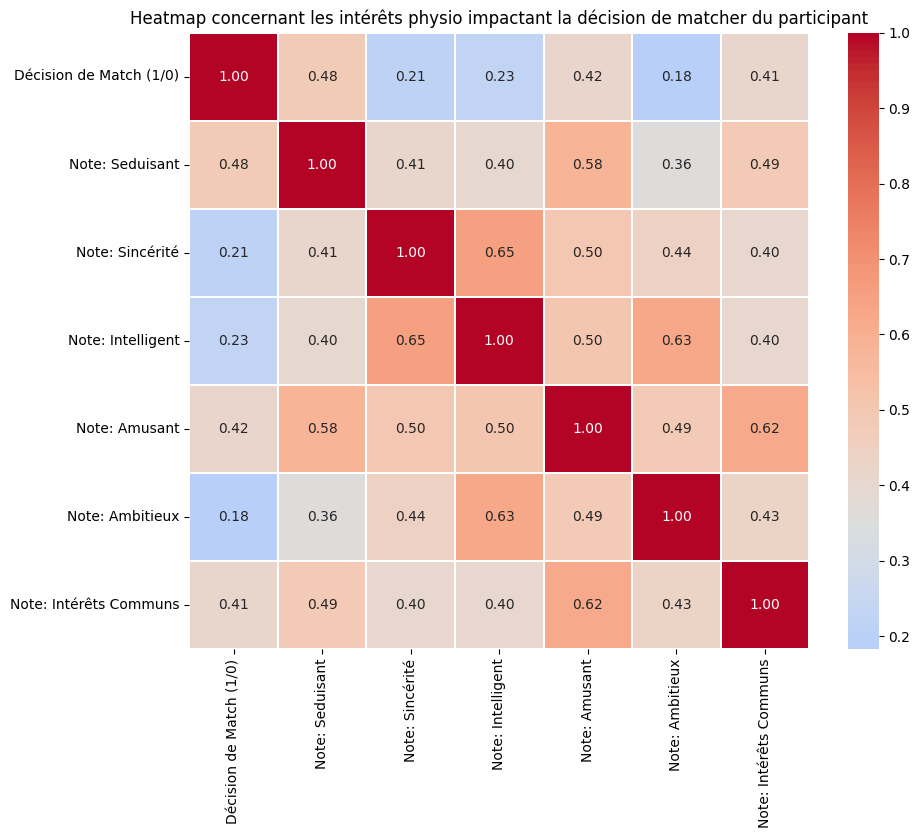

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(
    matrice_correlation_renommee,
    annot=True,
    center=0.35,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.3
)
plt.title('Heatmap concernant les critères de séduction impactant la décision de matcher du participant')
plt.show()

On remarque dans un premier temps que l'attirance physique est le critère prédominant qui va déterminer la décision de vouloir revoir le partenaire.

S'en suit le partage d'activités communes et le côté fun.

Le côté ambitieux, intelligent et sincère ont beaucoup moins d'impact sur la décision finale du participant. Le temps limité (4 minutes) par speed-dating peut expliquer que les participants aient peu de temps pour se faire une impression sur les facettes de la personnalité de leurs partenaires.

==============

Executons la même analyse selon la catégorie d'âge.

In [40]:
matrice_correlation_adult = df_clean[df_clean['categorie_age'] == 'Adultes_etablis'][columns_correlation].corr()


In [41]:
matrice_correlation_adult_renommee = matrice_correlation_adult.rename(
    columns=nouveaux_noms,
    index=nouveaux_noms
)

In [42]:
matrice_correlation_jeunes = df_clean[df_clean['categorie_age'] == 'Etudiants_Jeunes_actifs'][columns_correlation].corr()


In [43]:
matrice_correlation_jeunes_renommee = matrice_correlation_jeunes.rename(
    columns=nouveaux_noms,
    index=nouveaux_noms
)

### --- Visualisation / Corrélation entre critères de séduction et décision finale (catégorie d'âge) ---

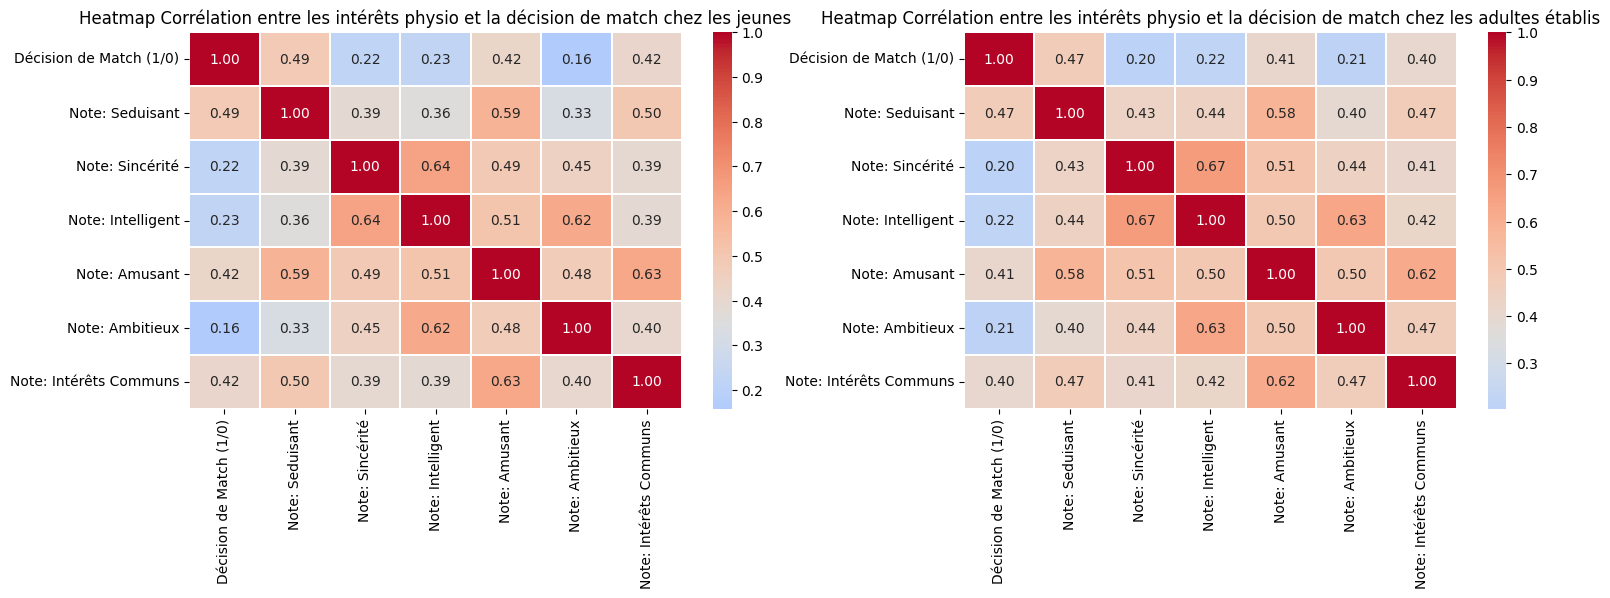

In [ ]:
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0,0])
sns.heatmap(matrice_correlation_jeunes_renommee, annot=True, center=0.35, cmap='coolwarm', fmt=".2f", linewidths=.3)
ax1.set_title('Heatmap Corrélation entre les critères de séduction et la décision de match chez les jeunes')

ax2 = fig.add_subplot(gs[0,1])
sns.heatmap(matrice_correlation_adult_renommee, annot=True, center=0.35, cmap='coolwarm', fmt=".2f", linewidths=.3)
ax2.set_title('Heatmap Corrélation entre les critères de séduction et la décision de match chez les adultes établis')

fig.tight_layout()
plt.show()

Quelque soit la catégorie d'âge, cela n'impacte pas les critères de séduction pris en compte dans la décision des participants de vouloir revoir leurs partenaires. 

==============

Désormais, effectuons la même analyse selon le genre.

In [45]:
matrice_correlation_male = df_clean[df_clean['genre'] == 'homme'][columns_correlation].corr()

In [46]:
matrice_correlation_male_renommee = matrice_correlation_male.rename(
    columns=nouveaux_noms,
    index=nouveaux_noms
)

In [47]:
matrice_correlation_female =df_clean[df_clean['genre'] == 'femme'][columns_correlation].corr()

In [48]:
matrice_correlation_female_renommee = matrice_correlation_female.rename(
    columns=nouveaux_noms,
    index=nouveaux_noms
)

### --- Visualisation / Corrélation entre critères de séduction et décision finale (genre) ---

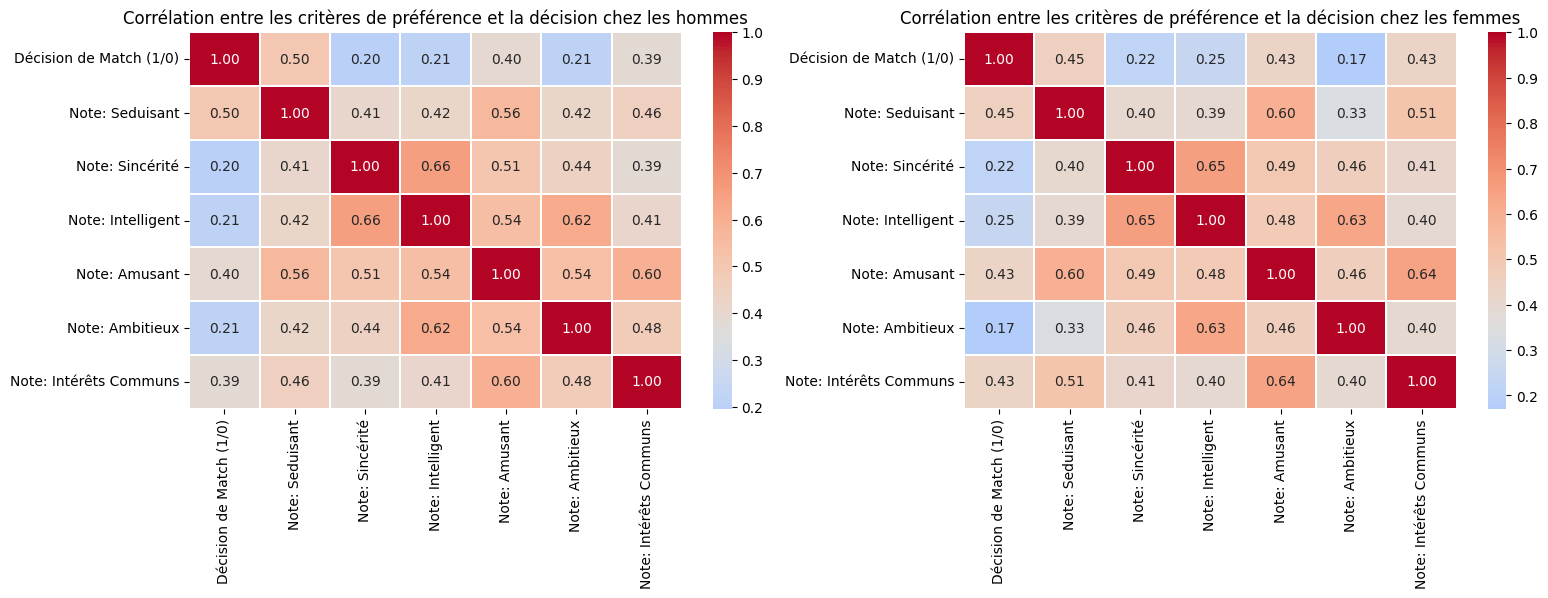

In [49]:
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0,0])
sns.heatmap(matrice_correlation_male_renommee, annot=True, center=0.35, cmap='coolwarm', fmt=".2f", linewidths=.3)
ax1.set_title('Corrélation entre les critères de préférence et la décision chez les hommes')

ax2 = fig.add_subplot(gs[0,1])
sns.heatmap(matrice_correlation_female_renommee, annot=True, center=0.35, cmap='coolwarm', fmt=".2f", linewidths=.3)
ax2.set_title('Corrélation entre les critères de préférence et la décision chez les femmes')

fig.tight_layout()
plt.show()

Le critère prioritaire pour matcher chez les hommes est le critère attractif. Ce qui confirme les données du barplot mettant en évidence les objectifs a priori de la gente masculine. 

Lorsque l'on étudie les critères les plus impactants sur la décision de revoir un partenaire via la heatmap, on peut observer que l'attractivité obtient le score le plus important pour les femmes également. Ce qui montre une incohérence avec le premier barplot montrant ce que recherche en priorité les femmes. 

==============

Analysons désormais l'importance portée aux différents critères de séduction selon la temporalité (le soir du speed-dating, le lendemain de la soirée et un mois après)

Pour cela, construisons un nouveau dataframe mettant en évidence la temporalité.

In [50]:
# --- Définir les groupes de colonnes par période ---
mesure_cols = ["seduisant_1T", "sincerite_1T", "intelligent_1T", "amusant_1T", "ambitieux_1T", "interetscommuns_1T","seduisant_2T", "sincerite_2T", "intelligent_2T", "amusant_2T", "ambitieux_2T", "interetscommuns_2T","seduisant_3T", "sincerite_3T", "intelligent_3T", "amusant_3T", "ambitieux_3T", "interetscommuns_3T"]
vars_cols = [col for col in df_clean.columns if col not in mesure_cols]

# Transformation du DataFrame (Melt)
# Les colonnes ID sont conservées, les 18 colonnes sont transformées.
df_critere_temps = pd.melt(
    df_clean,
    id_vars=vars_cols,
    value_vars=mesure_cols,
    var_name='Critère_Temps',
    value_name='Préférence'
)

# Séparation des variables Critère et Temps
df_critere_temps['Temps'] = df_critere_temps['Critère_Temps'].str.extract(r'(\dT)$')
df_critere_temps['Critère'] = df_critere_temps['Critère_Temps'].str.replace(r'_\dT$', '', regex=True)

mapping_temps = {
    '1T': 'Jour J',
    '2T': 'Le lendemain',
    '3T': '1 mois après'
}

df_critere_temps['Libellé_Temps'] = df_critere_temps['Temps'].map(mapping_temps)

ordre_temps_libelles = ['Jour J', 'Le lendemain', '1 mois après']
df_critere_temps['Libellé_Temps'] = pd.Categorical(
    df_critere_temps['Libellé_Temps'],
    categories=ordre_temps_libelles,
    ordered=True
)

df_critere_temps

,unique_ID,genre,vague,nb_personnes_rencontrees,ordre,partner,match,int_corr,samerace,age_partenaire,...,ambitieux_luimeme_3T,categorie_age,decision_uniqueID_label,date_frequence,sortie_frequence,Critère_Temps,Préférence,Temps,Critère,Libellé_Temps
0,1,femme,1,10,4,1,0,0.14,0,27.0,...,7.0,Etudiants_Jeunes_actifs,oui,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine,seduisant_1T,15.0,1T,seduisant,Jour J
1,1,femme,1,10,3,2,0,0.54,0,22.0,...,7.0,Etudiants_Jeunes_actifs,oui,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine,seduisant_1T,15.0,1T,seduisant,Jour J
2,1,femme,1,10,10,3,1,0.16,1,22.0,...,7.0,Etudiants_Jeunes_actifs,oui,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine,seduisant_1T,15.0,1T,seduisant,Jour J
3,1,femme,1,10,5,4,1,0.61,0,23.0,...,7.0,Etudiants_Jeunes_actifs,oui,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine,seduisant_1T,15.0,1T,seduisant,Jour J
4,1,femme,1,10,7,5,1,0.21,0,24.0,...,7.0,Etudiants_Jeunes_actifs,oui,rarement : quelques fois par an voire jamais,fréquemment : 1 à plusieurs fois par semaine,seduisant_1T,15.0,1T,seduisant,Jour J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122683,552,homme,21,22,5,18,0,0.64,0,26.0,...,7.0,Etudiants_Jeunes_actifs,non,fréquemment : 1 à plusieurs fois par semaine,fréquemment : 1 à plusieurs fois par semaine,interetscommuns_3T,0.0,3T,interetscommuns,1 mois après
122684,552,homme,21,22,4,19,0,0.71,0,24.0,...,7.0,Etudiants_Jeunes_actifs,non,fréquemment : 1 à plusieurs fois par semaine,fréquemment : 1 à plusieurs fois par semaine,interetscommuns_3T,0.0,3T,interetscommuns,1 mois après
122685,552,homme,21,22,10,20,0,-0.46,0,29.0,...,7.0,Etudiants_Jeunes_actifs,non,fréquemment : 1 à plusieurs fois par semaine,fréquemment : 1 à plusieurs fois par semaine,interetscommuns_3T,0.0,3T,interetscommuns,1 mois après
122686,552,homme,21,22,16,21,0,0.62,0,22.0,...,7.0,Etudiants_Jeunes_actifs,non,fréquemment : 1 à plusieurs fois par semaine,fréquemment : 1 à plusieurs fois par semaine,interetscommuns_3T,0.0,3T,interetscommuns,1 mois après


### --- Visualisation / Importance des critères de séduction dans le temps ---

C:\Users\simon\AppData\Local\Temp\ipykernel_24696\4255910230.py:3: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


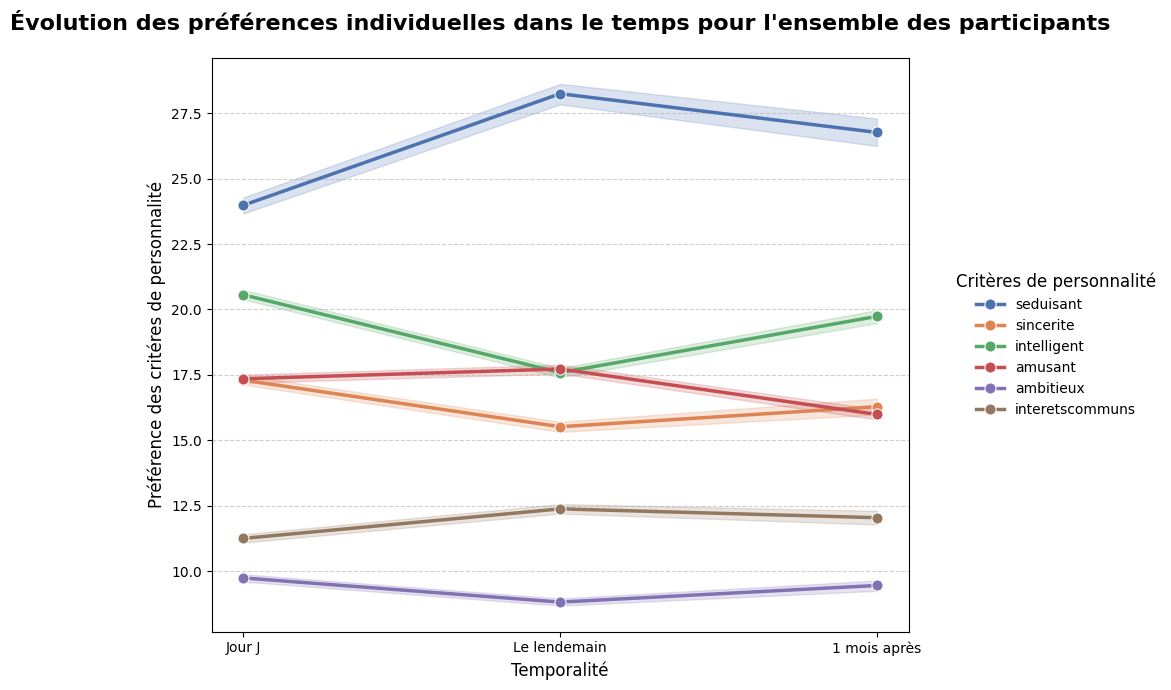

In [51]:
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=df_critere_temps,
    x='Libellé_Temps',      
    y='Préférence',
    hue='Critère',
    style='Critère',
    markers='o',
    dashes=False,
    errorbar='ci',
    err_style='band',
    linewidth=2.5,
    markersize=8,
    palette='deep'
)

plt.title(
    "Évolution des préférences individuelles dans le temps pour l'ensemble des participants",
    fontsize=16,
    fontweight='bold',
    pad=20
)

plt.xlabel("Temporalité", fontsize=12)
plt.ylabel("Préférence des critéres de personnalité", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(
    title="Critères de personnalité",
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    frameon=False,
    fontsize=10,
    title_fontsize=12
)

plt.tight_layout(rect=[0, 0, 0.88, 1])

plt.show()

In [52]:
# --- Définir les groupes de colonnes par période ---
mesure_cols = ["seduisant_1T", "sincerite_1T", "intelligent_1T", "amusant_1T", "ambitieux_1T", "interetscommuns_1T","seduisant_2T", "sincerite_2T", "intelligent_2T", "amusant_2T", "ambitieux_2T", "interetscommuns_2T","seduisant_3T", "sincerite_3T", "intelligent_3T", "amusant_3T", "ambitieux_3T", "interetscommuns_3T"]

id_vars_cols = [col for col in df_clean[df_clean['genre'] == 'femme'].columns if col not in mesure_cols]

# Transformation du DataFrame (Melt)
# Les colonnes ID sont conservées, les 18 colonnes sont transformées.
df_critere_temps = pd.melt(
    df_clean[df_clean['genre'] == 'femme'],
    id_vars=id_vars_cols,
    value_vars=mesure_cols,
    var_name='Critère_Temps',
    value_name='Préférence'
)

# Séparation des variables Critère et Temps
df_critere_temps['Temps'] = df_critere_temps['Critère_Temps'].str.extract(r'(\dT)$')
df_critere_temps['Critère'] = df_critere_temps['Critère_Temps'].str.replace(r'_\dT$', '', regex=True)

mapping_temps = {
    '1T': 'Jour J',
    '2T': 'le lendemain',
    '3T': '1 mois après'
}

# 1. Création de la nouvelle colonne avec les libellés
# df_critere_temps doit contenir la colonne 'Temps' (avec 1T, 2T, 3T)
df_critere_temps['Libellé_Temps'] = df_critere_temps['Temps'].map(mapping_temps)

# 2. Définir l'ordre catégoriel pour le nouvel axe X
ordre_temps_libelles = ['Jour J', 'le lendemain', '1 mois après']
df_critere_temps['Libellé_Temps'] = pd.Categorical(
    df_critere_temps['Libellé_Temps'],
    categories=ordre_temps_libelles,
    ordered=True
)

### --- Visualisation / Importance des critères de séduction dans le temps (genre) ---

C:\Users\simon\AppData\Local\Temp\ipykernel_24696\1593612839.py:3: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


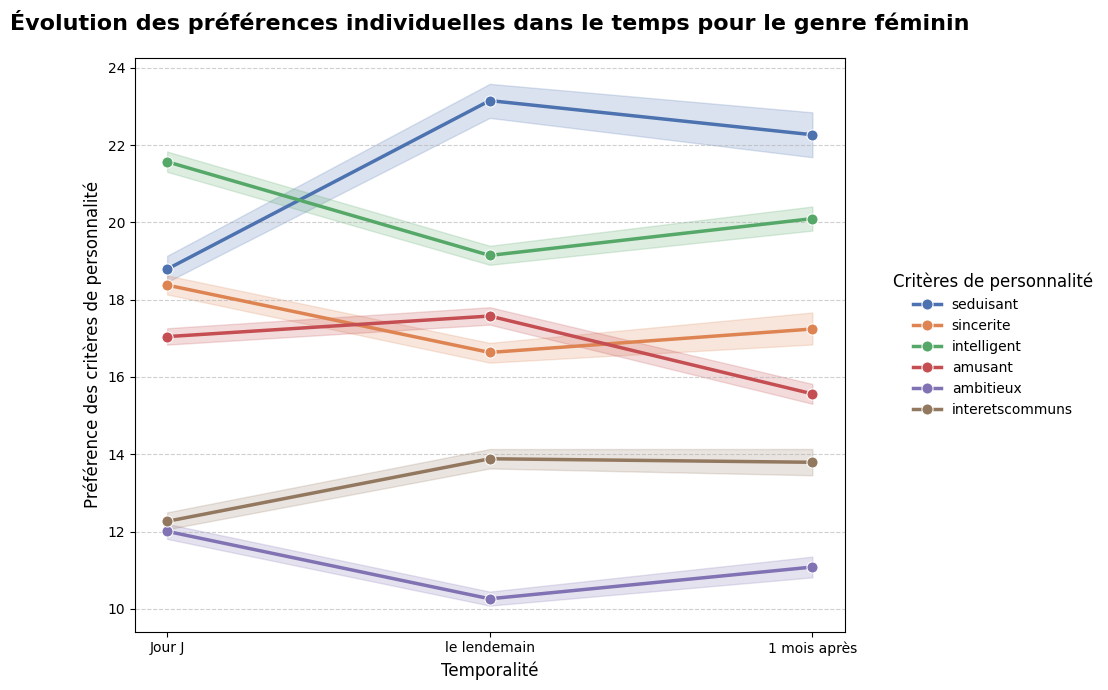

In [53]:
plt.figure(figsize=(12, 7))

sns.lineplot(
    data=df_critere_temps,
    x='Libellé_Temps',     
    y='Préférence',
    hue='Critère',
    markers= 'o',
    style='Critère',
    dashes=False,
    errorbar='ci',
    err_style='band',
    linewidth=2.5,
    markersize=8,
    palette='deep'
)

plt.title("Évolution des préférences individuelles dans le temps pour le genre féminin",fontsize=16,fontweight='bold',pad=20)
plt.xlabel("Temporalité", fontsize=12)
plt.ylabel("Préférence des critères de personnalité", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(title="Critères de personnalité",loc='center left',bbox_to_anchor=(1.05, 0.5),frameon=False,fontsize=10,title_fontsize=12)

plt.tight_layout(rect=[0, 0, 0.88, 1])

plt.show()

### --- Conclusion / Critères de corrélation ---

Pour le genre féminin, on remarque une inversion des positions entre l'attractivité et l'intelligence juste après la soirée de speed-dating. 

L'attractivité devient plus importante que l'intelligence concernant les traits de personnalité du partenaire masculin au sortir de la soirée. 

__________________________________________________________

# L'organisation des soirées speed-dating et leur impact sur le taux de match 

Développons désormais le thème de l'organisation des soirées. 

Les soirées speed-dating peuvent organiser de différentes façons, selon différents thèmes... Analysons si l'organisation de la soirée peut avoir un impact sur le taux de match du participant.

In [54]:
mean_match_order = df_clean.groupby('ordre')['match'].mean()
mean_match_order 

ordre
1     0.229399
2     0.155902
3     0.171492
4     0.180401
5     0.167038
6     0.173719
7     0.172986
8     0.165865
9     0.202439
10    0.183246
11    0.156667
12    0.133333
13    0.143333
14    0.153333
15    0.122137
16    0.099138
17    0.098592
18    0.169014
19    0.152174
20    0.192308
21    0.069767
22    0.227273
Name: match, dtype: float64

In [55]:
satisfaction_longueur_date = df_unique['longueur_date_satis'].value_counts()
satisfaction_longueur_date

longueur_date_satis
Trop court        220
durée adéquate    161
Trop long          13
Name: count, dtype: int64

In [56]:
satisfaction_nombre_date = df_unique['nombre_dates_satis'].value_counts()
satisfaction_nombre_date

nombre_dates_satis
Trop de dates         175
Nombre adéquat        168
Pas assez de dates     48
Name: count, dtype: int64

### --- Visualisation / Organisation et Match pendant la soirée ---

Text(0.5, 1.03, "Probabilité de match en fonction de l'ordre de passage")

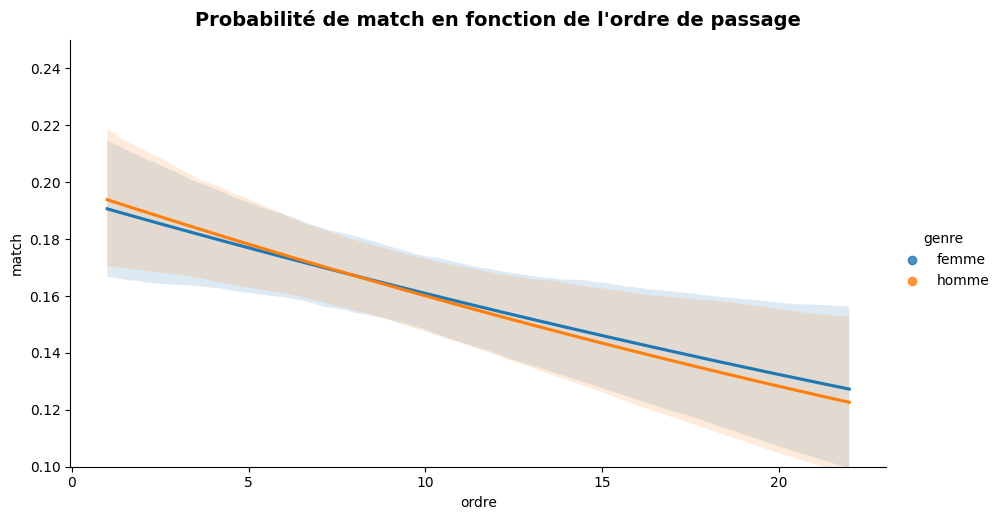

In [57]:
g = sns.lmplot(
    x='ordre',
    y='match',
    data=df_clean,
    hue = 'genre',
    ci=95,
    logistic=True,
    height=5,     
    aspect=1.8    
)

g.set(ylim=(0.1,0.25))
g.fig.suptitle(
    "Probabilité de match en fonction de l'ordre de passage",
    y=1.03, 
    fontsize=14,
    fontweight='bold'
)

la probabilité de match entre les participants baisse plus on avance dans la soirée de speed-dating. On remarque une baisse très légèrement plus marquée pour les hommes. 

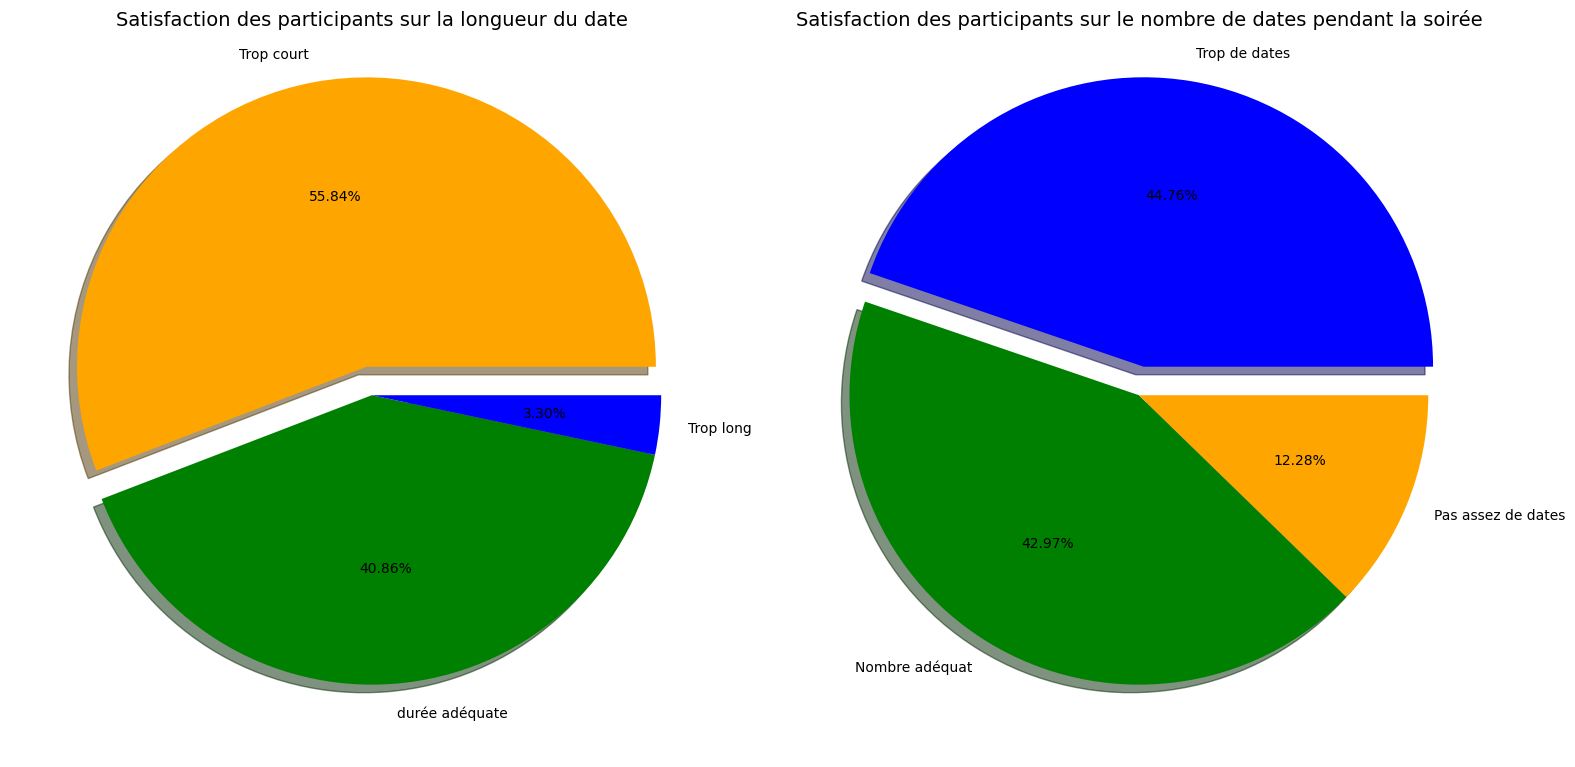

In [58]:
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(1, 2) 

ax0 = fig.add_subplot(gs[0, 0])
ax0.pie(
    satisfaction_longueur_date.values, 
    labels=satisfaction_longueur_date.index, 
    autopct="%1.2f%%", 
    shadow=True,
    explode=(0.1,0,0),
    colors= ['orange', 'green', 'blue']
)
ax0.set_title("Satisfaction des participants sur la longueur du date", fontsize=14)

ax1 = fig.add_subplot(gs[0, 1])
ax1.pie(
    satisfaction_nombre_date.values, 
    labels=satisfaction_nombre_date.index, 
    autopct="%1.2f%%", 
    shadow=True,
    explode=(0.1,0,0),
    colors= ['blue', 'green', 'orange']
)
ax1.set_title("Satisfaction des participants sur le nombre de dates pendant la soirée", fontsize=14)

plt.tight_layout()
plt.show()

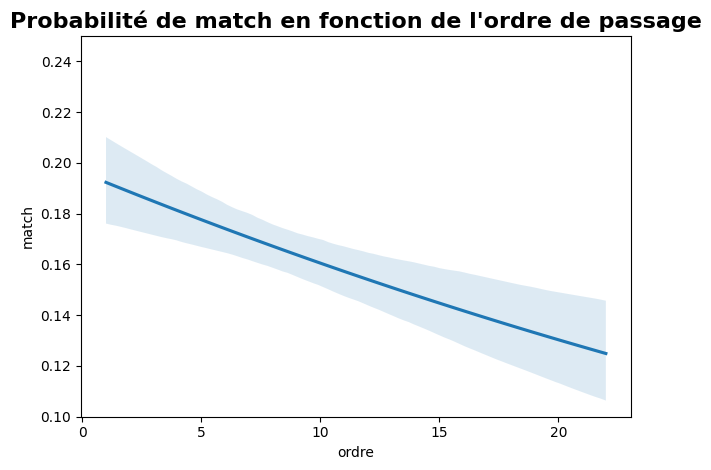

In [59]:
sns.regplot(
    x='ordre', 
    y='match', 
    data=df_clean,
    logistic=True,
    ci=95, 
    )

plt.title("Probabilité de match en fonction de l'ordre de passage", fontsize=16, fontweight='bold')
plt.ylim(0.1, 0.25) 

plt.tight_layout()
plt.show()

### --- Conclusion / Organisation des soirées speed-dating ---

Les participants jugent qu'il y a trop de dates pendant la soirée mais la longueur de chacun de ces dates sont jugés trop courts.

Suggestion: l'organisation doit-il baisser le nombre de dates et de participants par soirée et ainsi allonger le temps dudit date afin que les participants puissent mieux se connaitre ? 

________________________________________

# La perception de soi-même par rapport au jugement des partenaires

Dans le rapport aux autres, la perception de soi-même peut différer selon les personnes. On peut se sentir orgueilleux ou davantage modeste. 

Ici, nous allons analyser la perception de soi-même des participants par rapport à l'avis des différents partenaires rencontrées.

Pour cela, nous allons créer un nouveau dataframe reprenant les critères d'autoévaluation et un autre reprenant les notes données par les différents partenaires. 

In [60]:
colonnes_perception_partenaires = ["seduisant_selon_partenaire","sincerite_selon_partenaire","intelligent_selon_partenaire", "amusant_selon_partenaire", "ambitieux_selon_partenaire"]
nouveaux_noms_moyennes = ['moy_seduisant', 'moy_sincerite', 'moy_intelligent', 'moy_amusant', 'moy_ambitieux']

In [61]:
colonnes_autoperception = ["seduisant_luimeme_1T", "sincerite_luimeme_1T", "intelligent_luimeme_1T", "amusant_luimeme_1T", "ambitieux_luimeme_1T"]

df_auto_eval = df_clean[['unique_ID', 'genre', 'categorie_age', 'domaine_carriere', 'origine', 'exercise'] + colonnes_autoperception].drop_duplicates()
display(df_auto_eval)

,unique_ID,genre,categorie_age,domaine_carriere,origine,exercise,seduisant_luimeme_1T,sincerite_luimeme_1T,intelligent_luimeme_1T,amusant_luimeme_1T,ambitieux_luimeme_1T
0,1,femme,Etudiants_Jeunes_actifs,NaN,Asiatique/Insulaire du Pacifique/Asiatique-Amé...,8.0,6.0,8.0,8.0,8.0,7.0
10,2,femme,Etudiants_Jeunes_actifs,NaN,Européen/Caucasien-Américain,7.0,7.0,5.0,8.0,10.0,3.0
20,3,femme,Etudiants_Jeunes_actifs,NaN,Européen/Caucasien-Américain,7.0,8.0,9.0,9.0,8.0,8.0
30,4,femme,Etudiants_Jeunes_actifs,Avocat,Européen/Caucasien-Américain,6.0,7.0,8.0,7.0,9.0,8.0
40,5,femme,Etudiants_Jeunes_actifs,Avocat,Européen/Caucasien-Américain,7.0,6.0,3.0,10.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
8268,548,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,Européen/Caucasien-Américain,4.0,10.0,10.0,10.0,10.0,10.0
8290,549,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,Européen/Caucasien-Américain,6.0,7.0,10.0,9.0,8.0,9.0
8312,550,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,Européen/Caucasien-Américain,5.0,7.0,7.0,7.0,7.0,7.0
8334,551,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,noir/Afro-Américain,7.0,7.0,8.0,8.0,3.0,5.0


In [ ]:
df_auto_eval = df_auto_eval.dropna()

# Suppression des lignes comportant des valeurs manquantes

Etablissement de la colonne comportant la moyenne de chaque Id.

In [98]:
df_auto_eval['moyenne_autoeval'] = df_auto_eval[colonnes_autoperception].mean(axis=1)
print(df_auto_eval[['unique_ID', 'genre', 'categorie_age', 'domaine_carriere', 'origine', 'exercise','moyenne_autoeval']])

      unique_ID  genre            categorie_age  \
30            4  femme  Etudiants_Jeunes_actifs   
40            5  femme  Etudiants_Jeunes_actifs   
50            6  femme  Etudiants_Jeunes_actifs   
60            7  femme  Etudiants_Jeunes_actifs   
70            8  femme  Etudiants_Jeunes_actifs   
...         ...    ...                      ...   
8268        548  homme          Adultes_etablis   
8290        549  homme          Adultes_etablis   
8312        550  homme          Adultes_etablis   
8334        551  homme          Adultes_etablis   
8356        552  homme  Etudiants_Jeunes_actifs   

                                      domaine_carriere  \
30                                              Avocat   
40                                              Avocat   
50                                              Avocat   
60                                              Avocat   
70                        Arts Créatifs/Divertissement   
...                                    

In [64]:
display(df_auto_eval)

,unique_ID,genre,categorie_age,domaine_carriere,origine,exercise,seduisant_luimeme_1T,sincerite_luimeme_1T,intelligent_luimeme_1T,amusant_luimeme_1T,ambitieux_luimeme_1T,moyenne_autoeval
30,4,femme,Etudiants_Jeunes_actifs,Avocat,Européen/Caucasien-Américain,6.0,7.0,8.0,7.0,9.0,8.0,7.8
40,5,femme,Etudiants_Jeunes_actifs,Avocat,Européen/Caucasien-Américain,7.0,6.0,3.0,10.0,6.0,8.0,6.6
50,6,femme,Etudiants_Jeunes_actifs,Avocat,Asiatique/Insulaire du Pacifique/Asiatique-Amé...,9.0,5.0,7.0,9.0,8.0,5.0,6.8
60,7,femme,Etudiants_Jeunes_actifs,Avocat,Asiatique/Insulaire du Pacifique/Asiatique-Amé...,4.0,6.0,6.0,7.0,5.0,7.0,6.2
70,8,femme,Etudiants_Jeunes_actifs,Arts Créatifs/Divertissement,Européen/Caucasien-Américain,1.0,7.0,4.0,8.0,8.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8268,548,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,Européen/Caucasien-Américain,4.0,10.0,10.0,10.0,10.0,10.0,10.0
8290,549,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,Européen/Caucasien-Américain,6.0,7.0,10.0,9.0,8.0,9.0,8.6
8312,550,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,Européen/Caucasien-Américain,5.0,7.0,7.0,7.0,7.0,7.0,7.0
8334,551,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,noir/Afro-Américain,7.0,7.0,8.0,8.0,3.0,5.0,6.2


In [65]:
df_moyennes = df_clean.groupby('unique_ID')[colonnes_perception_partenaires].mean().reset_index()

# Renommer les colonnes pour la clarté
df_moyennes.columns = ['unique_ID'] + nouveaux_noms_moyennes 
display(df_moyennes)

,unique_ID,moy_seduisant,moy_sincerite,moy_intelligent,moy_amusant,moy_ambitieux
0,1,6.700000,7.400000,8.000000,7.200000,8.000000
1,2,7.700000,7.100000,7.900000,7.500000,7.500000
2,3,6.500000,7.100000,7.300000,6.200000,7.111111
3,4,7.000000,7.100000,7.700000,7.500000,7.700000
4,5,5.300000,7.700000,7.600000,7.200000,7.800000
...,...,...,...,...,...,...
444,548,6.857143,5.809524,6.666667,5.714286,6.150000
445,549,6.350000,6.650000,6.850000,6.650000,6.000000
446,550,5.136364,5.818182,6.500000,5.272727,6.363636
447,551,6.142857,6.666667,6.761905,5.571429,6.238095


In [66]:
df_moyennes['moyenne_perception_participants'] = df_moyennes[nouveaux_noms_moyennes].mean(axis=1)
print(df_moyennes[['unique_ID','moyenne_perception_participants']])

     unique_ID  moyenne_perception_participants
0            1                         7.460000
1            2                         7.540000
2            3                         6.842222
3            4                         7.400000
4            5                         7.120000
..         ...                              ...
444        548                         6.239524
445        549                         6.500000
446        550                         5.818182
447        551                         6.276190
448        552                         6.241579

[449 rows x 2 columns]


In [67]:
df_autoeval_resume = df_auto_eval[['unique_ID', 'genre', 'categorie_age', 'domaine_carriere', 'origine', 'moyenne_autoeval']]
df_partenaires_resume = df_moyennes[['unique_ID','moyenne_perception_participants']]

Etablissement d'un dataframe reprenant les 2 moyennes pour comparaison

In [68]:
df_comparaison = pd.merge(
    df_autoeval_resume,
    df_partenaires_resume,
    on='unique_ID',
    how='inner' 
)

print(df_comparaison)

     unique_ID  genre            categorie_age  \
0            4  femme  Etudiants_Jeunes_actifs   
1            5  femme  Etudiants_Jeunes_actifs   
2            6  femme  Etudiants_Jeunes_actifs   
3            7  femme  Etudiants_Jeunes_actifs   
4            8  femme  Etudiants_Jeunes_actifs   
..         ...    ...                      ...   
431        548  homme          Adultes_etablis   
432        549  homme          Adultes_etablis   
433        550  homme          Adultes_etablis   
434        551  homme          Adultes_etablis   
435        552  homme  Etudiants_Jeunes_actifs   

                                     domaine_carriere  \
0                                              Avocat   
1                                              Avocat   
2                                              Avocat   
3                                              Avocat   
4                        Arts Créatifs/Divertissement   
..                                                ...   


In [99]:
# Création d'une colonne Indice_Modestie_Global pour connaitre l'ensemble des participants modestes ou orgueilleux

df_comparaison['Indice_Modestie_Global'] = (df_comparaison['moyenne_perception_participants'] - df_comparaison['moyenne_autoeval'])


# Afficher les résultats triés pour voir les individus les plus modestes/surestimés
df_comparaison_finale = df_comparaison.sort_values(by='Indice_Modestie_Global', ascending=False)

print("\n--- Comparaison Finale par Unique ID ---")
print(df_comparaison_finale)


--- Comparaison Finale par Unique ID ---
     unique_ID  genre            categorie_age  \
334        451  homme          Adultes_etablis   
100        108  homme  Etudiants_Jeunes_actifs   
128        240  femme  Etudiants_Jeunes_actifs   
98         106  homme  Etudiants_Jeunes_actifs   
205        317  homme          Adultes_etablis   
..         ...    ...                      ...   
228        342  femme          Adultes_etablis   
114        124  homme  Etudiants_Jeunes_actifs   
431        548  homme          Adultes_etablis   
232        347  femme  Etudiants_Jeunes_actifs   
410        527  femme  Etudiants_Jeunes_actifs   

                                     domaine_carriere  \
334  Banque/Consulting/Finance/Marketing/Affaires/PDG   
100                                         Ingénieur   
128                      Arts Créatifs/Divertissement   
98                                             Avocat   
205  Banque/Consulting/Finance/Marketing/Affaires/PDG   
..             

In [70]:
mean_global_img = df_comparaison_finale['Indice_Modestie_Global'].mean()
print(f"l'indice moyen de modestie pour l'ensemble des participants est de {mean_global_img}")


l'indice moyen de modestie pour l'ensemble des participants est de -0.9782196064345122


In [71]:
mean_by_genre = df_comparaison_finale.groupby('genre')['Indice_Modestie_Global'].mean()
min_by_genre = df_comparaison_finale.groupby('genre')['Indice_Modestie_Global'].min()
max_by_genre = df_comparaison_finale.groupby('genre')['Indice_Modestie_Global'].max()

In [72]:
mean_by_categorie_age = df_comparaison_finale.groupby('categorie_age')['Indice_Modestie_Global'].mean()
min_by_categorie_age = df_comparaison_finale.groupby('categorie_age')['Indice_Modestie_Global'].min()
max_by_categorie_age = df_comparaison_finale.groupby('categorie_age')['Indice_Modestie_Global'].max()

### --- Visualisation / Indice de Modestie ---

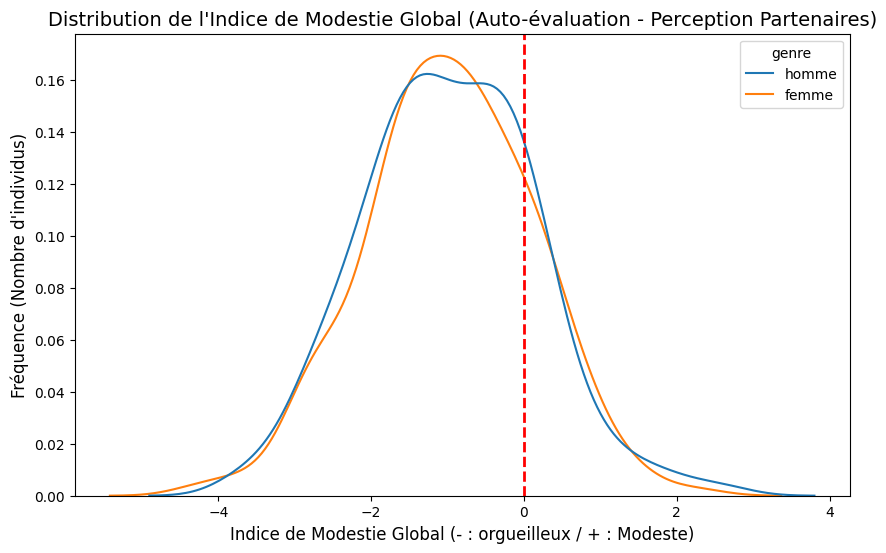

In [73]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data = df_comparaison_finale, x = 'Indice_Modestie_Global', hue = "genre")

plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Point de Réalisme (Différence = 0)')

plt.title('Distribution de l\'Indice de Modestie Global (Auto-évaluation - Perception Partenaires)', fontsize=14)
plt.xlabel('Indice de Modestie Global (- : orgueilleux / + : Modeste)', fontsize=12)
plt.ylabel('Fréquence (Nombre d\'individus)', fontsize=12)

plt.show()

### --- Synthèse des indices de modestie selon le genre et la catégorie d'âge ---

In [74]:
min_adultes_etablis = min_by_categorie_age.loc['Adultes_etablis']
min_Etudiants_Jeunes_actifs = min_by_categorie_age.loc['Etudiants_Jeunes_actifs']
max_adultes_etablis = max_by_categorie_age.loc['Adultes_etablis']
max_Etudiants_Jeunes_actifs = max_by_categorie_age.loc['Etudiants_Jeunes_actifs']
mean_adultes_etablis = mean_by_categorie_age.loc['Adultes_etablis']
mean_Etudiants_Jeunes_actifs = mean_by_categorie_age.loc['Etudiants_Jeunes_actifs']

print(f"les indices de modestie pour notre panel chez les Etudiants_Jeunes_actifs vont de {min_Etudiants_Jeunes_actifs:.2f} à {max_Etudiants_Jeunes_actifs:.2f}.")

print(f"les indices de modestie pour notre panel chez les adultes_etablis vont de {min_adultes_etablis:.2f} à {max_adultes_etablis:.2f}.")

print(f"l'indice de modestie moyen pour les Etudiants_Jeunes_actifs est de {mean_Etudiants_Jeunes_actifs:.2f} et de {mean_adultes_etablis:.2f} pour les adultes_etablis.")


les indices de modestie pour notre panel chez les Etudiants_Jeunes_actifs vont de -4.30 à 2.28.
les indices de modestie pour notre panel chez les adultes_etablis vont de -3.76 à 2.66.
l'indice de modestie moyen pour les Etudiants_Jeunes_actifs est de -0.94 et de -1.03 pour les adultes_etablis.


In [75]:
min_femme = min_by_genre.loc['femme']
min_homme = min_by_genre.loc['homme']
max_femme = max_by_genre.loc['femme']
max_homme = max_by_genre.loc['homme']
mean_femme = mean_by_genre.loc['femme']
mean_homme = mean_by_genre.loc['homme']

print(f"les indices de modestie pour notre panel chez les hommes vont de {min_homme:.2f} à {max_homme:.2f}.")

print(f"les indices de modestie pour notre panel chez les femmes vont de {min_femme:.2f} à {max_femme:.2f}.")

print(f"l'indice de modestie moyen pour les hommes est de {mean_homme:.2f} et de {mean_femme:.2f} pour les femmes.")

les indices de modestie pour notre panel chez les hommes vont de -3.76 à 2.66.
les indices de modestie pour notre panel chez les femmes vont de -4.30 à 2.24.
l'indice de modestie moyen pour les hommes est de -0.98 et de -0.98 pour les femmes.


==============

Faisons un focus sur l'origine des participants

### --- Visualisation / Indice de modestie selon l'origine ---

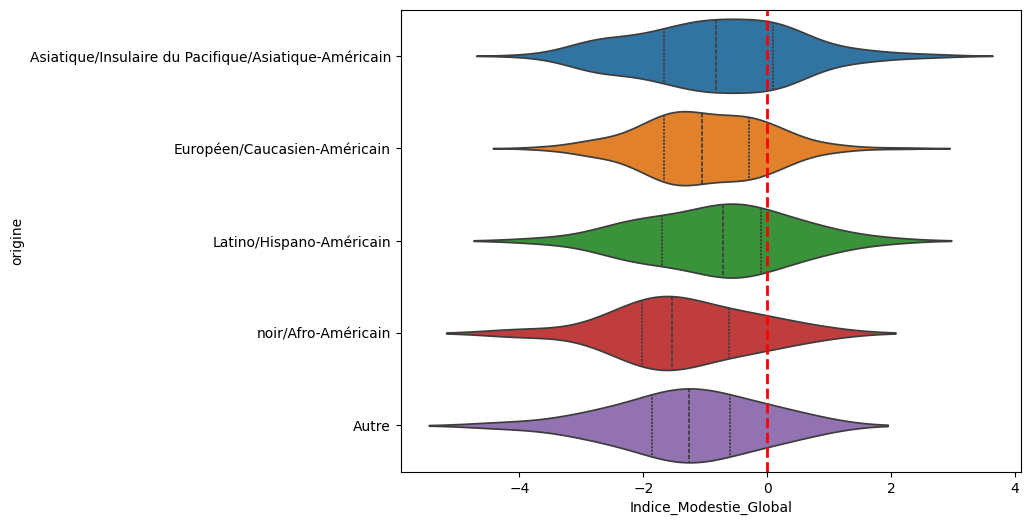

In [76]:
plt.figure(figsize=(8, 6))
sns.violinplot(data = df_comparaison_finale, x = 'Indice_Modestie_Global', y = 'origine', orient='h', hue='origine', inner='quartile')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Point de Réalisme')
plt.show()

==============

### --- L'indice de modestie évalué au lendemain de la soirée ---

In [77]:
colonnes_autoperception_2T = ["seduisant_luimeme_2T", "sincerite_luimeme_2T", "intelligent_luimeme_2T", "amusant_luimeme_2T", "ambitieux_luimeme_2T"]

df_auto_eval_2T = df_clean[['unique_ID', 'genre', 'categorie_age', 'domaine_carriere', 'origine', 'exercise'] + colonnes_autoperception_2T].drop_duplicates()
display(df_auto_eval_2T)

,unique_ID,genre,categorie_age,domaine_carriere,origine,exercise,seduisant_luimeme_2T,sincerite_luimeme_2T,intelligent_luimeme_2T,amusant_luimeme_2T,ambitieux_luimeme_2T
0,1,femme,Etudiants_Jeunes_actifs,NaN,Asiatique/Insulaire du Pacifique/Asiatique-Amé...,8.0,6.0,7.0,8.0,7.0,6.0
10,2,femme,Etudiants_Jeunes_actifs,NaN,Européen/Caucasien-Américain,7.0,7.0,6.0,8.0,9.0,4.0
20,3,femme,Etudiants_Jeunes_actifs,NaN,Européen/Caucasien-Américain,7.0,NaN,NaN,NaN,NaN,NaN
30,4,femme,Etudiants_Jeunes_actifs,Avocat,Européen/Caucasien-Américain,6.0,6.0,8.0,7.0,8.0,6.0
40,5,femme,Etudiants_Jeunes_actifs,Avocat,Européen/Caucasien-Américain,7.0,6.0,6.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
8268,548,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,Européen/Caucasien-Américain,4.0,8.0,9.0,10.0,10.0,8.0
8290,549,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,Européen/Caucasien-Américain,6.0,6.0,8.0,8.0,8.0,8.0
8312,550,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,Européen/Caucasien-Américain,5.0,7.0,4.0,6.0,7.0,7.0
8334,551,homme,Adultes_etablis,Banque/Consulting/Finance/Marketing/Affaires/PDG,noir/Afro-Américain,7.0,7.0,7.0,8.0,4.0,5.0


In [100]:
df_auto_eval_2T = df_auto_eval_2T.dropna()

# Suppression des lignes comportant des valeurs manquantes

In [79]:
df_auto_eval_2T['moyenne_autoeval'] = df_auto_eval_2T[colonnes_autoperception_2T].mean(axis=1)
print(df_auto_eval_2T[['unique_ID', 'genre', 'categorie_age', 'domaine_carriere', 'origine', 'exercise','moyenne_autoeval']])

      unique_ID  genre            categorie_age  \
30            4  femme  Etudiants_Jeunes_actifs   
40            5  femme  Etudiants_Jeunes_actifs   
50            6  femme  Etudiants_Jeunes_actifs   
80            9  femme  Etudiants_Jeunes_actifs   
90           10  femme  Etudiants_Jeunes_actifs   
...         ...    ...                      ...   
8268        548  homme          Adultes_etablis   
8290        549  homme          Adultes_etablis   
8312        550  homme          Adultes_etablis   
8334        551  homme          Adultes_etablis   
8356        552  homme  Etudiants_Jeunes_actifs   

                                      domaine_carriere  \
30                                              Avocat   
40                                              Avocat   
50                                              Avocat   
80               Affaires Internationales/Humanitaires   
90               Affaires Internationales/Humanitaires   
...                                    

In [80]:
df_moyennes = df_clean.groupby('unique_ID')[colonnes_perception_partenaires].mean().reset_index()

df_moyennes.columns = ['unique_ID'] + nouveaux_noms_moyennes 
display(df_moyennes)

,unique_ID,moy_seduisant,moy_sincerite,moy_intelligent,moy_amusant,moy_ambitieux
0,1,6.700000,7.400000,8.000000,7.200000,8.000000
1,2,7.700000,7.100000,7.900000,7.500000,7.500000
2,3,6.500000,7.100000,7.300000,6.200000,7.111111
3,4,7.000000,7.100000,7.700000,7.500000,7.700000
4,5,5.300000,7.700000,7.600000,7.200000,7.800000
...,...,...,...,...,...,...
444,548,6.857143,5.809524,6.666667,5.714286,6.150000
445,549,6.350000,6.650000,6.850000,6.650000,6.000000
446,550,5.136364,5.818182,6.500000,5.272727,6.363636
447,551,6.142857,6.666667,6.761905,5.571429,6.238095


In [81]:
df_moyennes['moyenne_perception_participants'] = df_moyennes[nouveaux_noms_moyennes].mean(axis=1)
print(df_moyennes[['unique_ID','moyenne_perception_participants']])

     unique_ID  moyenne_perception_participants
0            1                         7.460000
1            2                         7.540000
2            3                         6.842222
3            4                         7.400000
4            5                         7.120000
..         ...                              ...
444        548                         6.239524
445        549                         6.500000
446        550                         5.818182
447        551                         6.276190
448        552                         6.241579

[449 rows x 2 columns]


In [82]:
df_autoeval_2T_resume = df_auto_eval_2T[['unique_ID', 'genre', 'categorie_age', 'domaine_carriere', 'origine', 'moyenne_autoeval']]
df_partenaires_resume = df_moyennes[['unique_ID','moyenne_perception_participants']]

In [83]:
df_comparaison_2T = pd.merge(
    df_autoeval_2T_resume,
    df_partenaires_resume,
    on='unique_ID',
    how='inner' 
)

print(df_comparaison_2T)

     unique_ID  genre            categorie_age  \
0            4  femme  Etudiants_Jeunes_actifs   
1            5  femme  Etudiants_Jeunes_actifs   
2            6  femme  Etudiants_Jeunes_actifs   
3            9  femme  Etudiants_Jeunes_actifs   
4           10  femme  Etudiants_Jeunes_actifs   
..         ...    ...                      ...   
381        548  homme          Adultes_etablis   
382        549  homme          Adultes_etablis   
383        550  homme          Adultes_etablis   
384        551  homme          Adultes_etablis   
385        552  homme  Etudiants_Jeunes_actifs   

                                     domaine_carriere  \
0                                              Avocat   
1                                              Avocat   
2                                              Avocat   
3               Affaires Internationales/Humanitaires   
4               Affaires Internationales/Humanitaires   
..                                                ...   


In [84]:
df_comparaison_2T['Indice_Modestie_Global'] = (df_comparaison_2T['moyenne_perception_participants'] - df_comparaison_2T['moyenne_autoeval'])


# Afficher les résultats triés pour voir les individus les plus modestes/surestimés
df_comparaison_finale_2T = df_comparaison_2T.sort_values(by='Indice_Modestie_Global', ascending=False)

print("\n--- Comparaison Finale par Unique ID ---")
print(df_comparaison_finale_2T)


--- Comparaison Finale par Unique ID ---
     unique_ID  genre            categorie_age  \
92         108  homme  Etudiants_Jeunes_actifs   
102        121  femme  Etudiants_Jeunes_actifs   
55          70  homme  Etudiants_Jeunes_actifs   
307        463  homme  Etudiants_Jeunes_actifs   
298        451  homme          Adultes_etablis   
..         ...    ...                      ...   
323        483  homme          Adultes_etablis   
210        342  femme          Adultes_etablis   
148        271  femme  Etudiants_Jeunes_actifs   
325        485  homme          Adultes_etablis   
366        531  homme  Etudiants_Jeunes_actifs   

                                     domaine_carriere  \
92                                          Ingénieur   
102                           Universitaire/Recherche   
55   Banque/Consulting/Finance/Marketing/Affaires/PDG   
307                                           Indécis   
298  Banque/Consulting/Finance/Marketing/Affaires/PDG   
..             

### --- Visualisation / Indice de Modestie au lendemain de soirée ---

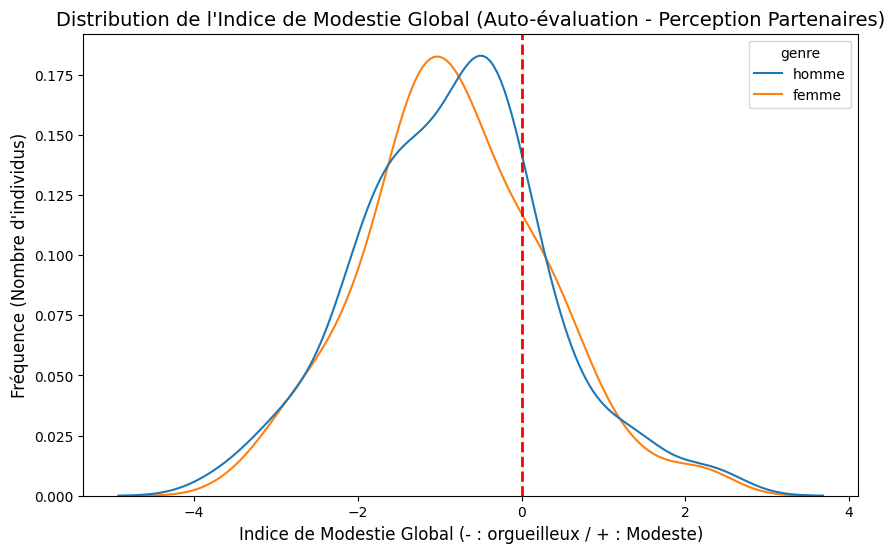

In [85]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data = df_comparaison_finale_2T, x = 'Indice_Modestie_Global', hue = "genre")

plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Point de Réalisme (Différence = 0)')

plt.title('Distribution de l\'Indice de Modestie Global (Auto-évaluation - Perception Partenaires)', fontsize=14)
plt.xlabel('Indice de Modestie Global (- : orgueilleux / + : Modeste)', fontsize=12)
plt.ylabel('Fréquence (Nombre d\'individus)', fontsize=12)

plt.show()

In [96]:
mean_global_img_2T = df_comparaison_finale_2T['Indice_Modestie_Global'].mean()
print(f"au lendemain de la soirée, l'indice moyen de modestie pour l'ensemble des participants est de {mean_global_img_2T}")

au lendemain de la soirée, l'indice moyen de modestie pour l'ensemble des participants est de -0.8289863592298965


### --- Conclusion / Indice moyen de modestie ---

On remarque que les participants, quel que soit le genre, se surévaluent par rapport à l'avis émis par leurs partenaires du soir. 

Ils deviennent un peu plus modestes au lendemain de la soirée. 

Concernant l'origine des participants, ils sont plus orgueilleux pour les participants de la communauté afro et un peu plus modestes que la moyenne pour la communauté asiatique ou latino. 

--------------------------------------------------------------------

# L'expérience des participants vis à vis des soirées speed-dating et leur impact sur le taux de match

Voyons désormais si l'expérience des soirées speed-dating, la sociabilité des participants peut avoir un impact sur le taux de match. 

In [87]:
date_frequence_counts = df_unique['date_frequence'].value_counts()
date_frequence_counts

date_frequence
rarement : quelques fois par an voire jamais    187
fréquence moyenne : 1 à 2 fois par mois         186
fréquemment : 1 à plusieurs fois par semaine     69
Name: count, dtype: int64

In [88]:
sortie_frequence_counts = df_unique['sortie_frequence'].value_counts()
sortie_frequence_counts

sortie_frequence
fréquemment : 1 à plusieurs fois par semaine    400
fréquence moyenne : 1 à 2 fois par mois          35
rarement : quelques fois par an voire jamais      8
Name: count, dtype: int64

### --- Visualisation / Expérience des participants ---

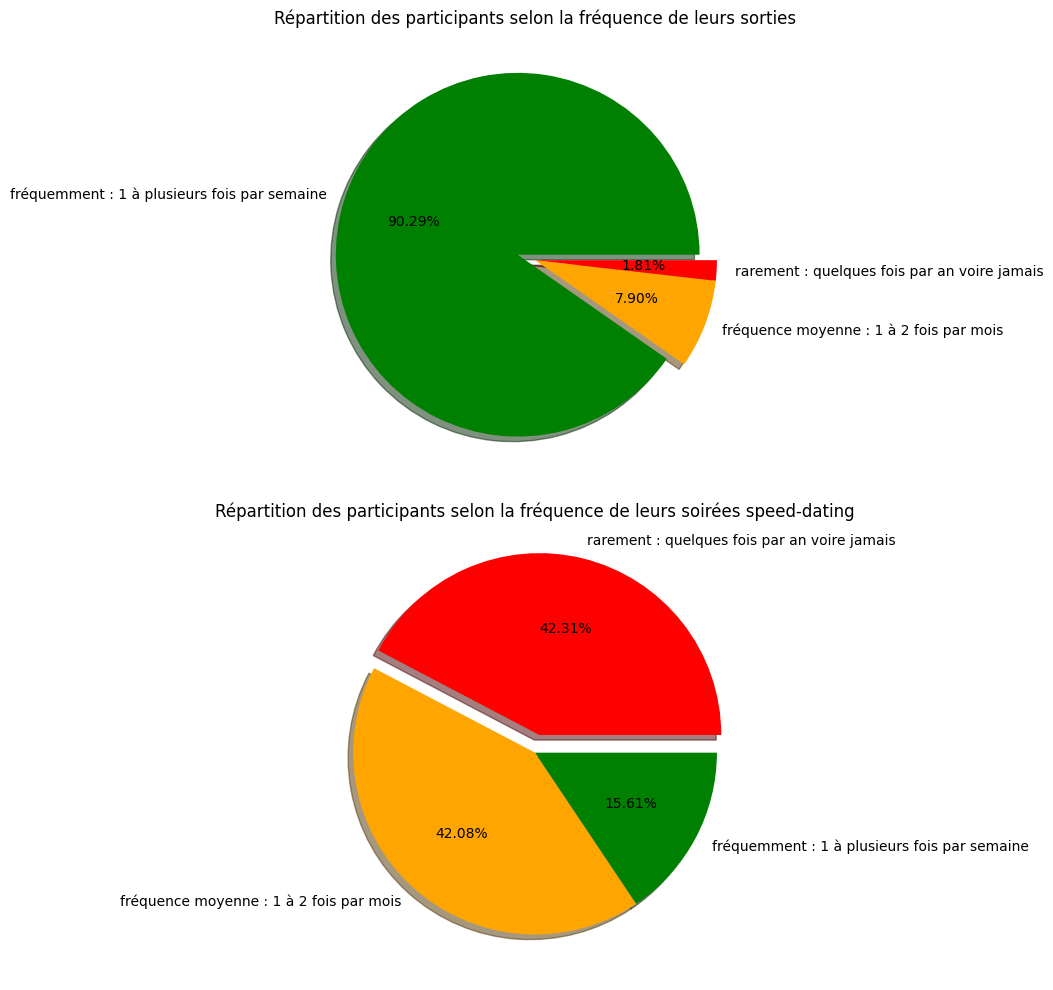

In [89]:
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax2 = fig.add_subplot(gs[0,0])
ax2.pie(sortie_frequence_counts.values, labels=sortie_frequence_counts.index, explode= (0.1,0,0), colors=['green', 'orange', 'red'], autopct="%1.2f%%", shadow=True)
ax2.set_title("Répartition des participants selon la fréquence de leurs sorties")

ax2 = fig.add_subplot(gs[1,0])
ax2.pie(date_frequence_counts.values, labels=date_frequence_counts.index, explode= (0.1,0,0),colors=['red', 'orange', 'green'], autopct="%1.2f%%", shadow=True)
ax2.set_title("Répartition des participants selon la fréquence de leurs soirées speed-dating")

fig.tight_layout()
plt.show()

In [101]:
# Création d'une colonne Taux_Match reprenant la moyenne de matchs selon le nombre de rencontres

df_clean['Taux_Match'] = df_clean.groupby('unique_ID')['match'].transform('mean')

In [102]:
display(df_clean['Taux_Match'])

0       0.400000
1       0.400000
2       0.400000
3       0.400000
4       0.400000
          ...   
8373    0.272727
8374    0.272727
8375    0.272727
8376    0.272727
8377    0.272727
Name: Taux_Match, Length: 6816, dtype: float64

In [103]:
df_unique = df_clean.drop_duplicates('unique_ID')

In [93]:
print(df_unique.columns)

Index(['unique_ID', 'genre', 'vague', 'nb_personnes_rencontrees', 'ordre',
       'partner', 'match', 'int_corr', 'samerace', 'age_partenaire',
       'origine_partenaire', 'pref_partenaire_att', 'pf_o_sin', 'pf_o_int',
       'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'decision_partenaire',
       'seduisant_selon_partenaire', 'sincerite_selon_partenaire',
       'intelligent_selon_partenaire', 'amusant_selon_partenaire',
       'ambitieux_selon_partenaire', 'shar_o', 'like_o', 'prob_o', 'met_o',
       'age', 'field', 'domaine_etudes', 'origine', 'importance_meme_origine',
       'importance_meme_religion', 'objectif', 'date', 'sortie', 'career',
       'domaine_carriere', 'sports', 'exercise', 'heureux_avant',
       'seduisant_1T', 'sincerite_1T', 'intelligent_1T', 'amusant_1T',
       'ambitieux_1T', 'interetscommuns_1T', 'seduisant_luimeme_1T',
       'sincerite_luimeme_1T', 'amusant_luimeme_1T', 'intelligent_luimeme_1T',
       'ambitieux_luimeme_1T', 'decision_uniqueID', 'note_seduisa

In [94]:
taux_par_frequence_date = df_unique.groupby('date_frequence')['Taux_Match'].mean().reset_index()
taux_par_frequence_date

,date_frequence,Taux_Match
0,fréquemment : 1 à plusieurs fois par semaine,0.230284
1,fréquence moyenne : 1 à 2 fois par mois,0.174420
2,rarement : quelques fois par an voire jamais,0.141289


### --- Visualisation / Le taux de match selon l'expérience des participants ---

In [95]:
custom_colors = ['red', 'orange','green']

fig = px.box(df_unique, x="date_frequence", y="Taux_Match", color="date_frequence", points="all", notched=True, color_discrete_sequence=custom_colors)
fig.show()

### --- Conclusion / habitude des soirées speed-dating ---

On remarque que plus le participant est habitué aux soirées speed-dating, plus le taux de match augmente. 

Grâce au scatterplot, on peut remarquer que l'étendue des points est plus importante quand le participant est là fréquemment lors de ses soirées. 

L'habitude des soirées peut ainsi encourager les participants à s'ouvrir à l'autre et à être plus à l'aise. 

Suggestion : on peut ainsi encourager les participants à fréquenter plus régulièrement les soirées afin que les matchs soient de plus en plus fréquents.
L'organisateur pourrait aussi fidéliser son public pour qu'il soit davantage en réussite sur son taux de taux.

------------------------------------------------------------------

## - Conclusion Finale -

Avec un panel équilibré en terme de genre et un âge médian de 26 ans, nous avons pu faire plusieurs observations :

- Les participants, quel que soit le genre, ont pour objectif de passer une bonne soirée et de rencontrer de nouvelles personnes en priorité. Cela diffère que très peu avec l'âge. 

- Le critère de séduction le plus important est l'attractivité. Les femmes mettent l'intelligence en priorité avant de participer à la soirée mais l'attractivité reprend le dessus suite à ladite soirée. 

- Le taux de match recule au fil de la soirée. Les participants ont émis un avis de soirées avec trop de rencontres dont celles-ci étaient trop rapides. 

    -> L'organisateur pourrait, à l'avenir, restreindre le nombre de rencontres et aggrandir le temps d'une rencontre entre 2 participants. Cela pourrait ainsi avoir un impact sur les matchs et les critères priorisés.

- Le participant, en tant que tel, est orgueilleux par rapport à ce que les partenaires pensent de lui. Il redevient un peu plus modeste le lendemain de la soirée mais reste de nature orgueilleux. 

    -> Cela ne diffère que très peu quand on compare le genre, l'âge ou même l'origine du participant. 

- Plus le participant acquiert de l'expérience dans ces soirées speed-dating, plus son taux de match peut être important. 

    -> On peut ainsi l'encourager à multiplier ce genre de soirées et aussi encourager l'organisateur à entreprendre des actions de fidélisation. 